# DISEÑO DEL PROYECTO 

En este proyecto se simula que trabajamos para una empresa inmobiliraria que hace inversiones en grandes ciudades comprando inmuebles para posteriormente alquilarlos como apartamentos turísticos.

Se ha tomado la decisión de invertir en Madrid, para ello vamos a analizar los datos que el líder del sector AirBnb hace públicos para intentar encontrar los tipos de inmuebles que tienen mayor potencial comercial para alquier turístico.

Se espera encontrar las oportunidades existentes en la ciudad y los principales barrios o zonas geográficas en las que focalizarse.



### Objetivo

Localizar el perfil (o perfiles) de inmuebles que maximizan el potencial comercial en el mercado del alquiler turístico y las principales zonas donde buscarlos. 

### PALANCAS

Tras hablar con el equipo de valoraciones nos dicen que las palancas que tienen más impacto en la rentabilidad de este tipo de inversiones son:

* **Precio alquiler**: cuanto más se pueda cobrar por noche mayor es la rentabilidad
* **Ocupación**: en general cuantos más días al año se pueda alquilar un inmueble mayor es su rentabilidad
* **Precio inmueble**: cuanto más barato se pueda adquirir la propiedad mayor es la rentabilidad

### KPIs

En este ejemplo los Kpis son bastante directos:

* Mediremos la ocupación como el número de días anuales que el inmueble se pueda alquilar
* Mediremos el precio del alquiler como el precio por noche en euros según Airbnb
* Mediremos el precio de un inmueble como la multiplicación entre el número de metros cuadrados y el precio medio del m2 en su zona, y aplicaremos un 25% de descuento sobre el precio oficial por la fuerza de negociciación de nuestro equipo de compras.

### Entidades y datos

Las entidades relevantes para nuestro objetivo y de las que podemos disponer de datos son:

* Inmuebles
* Propietarios
* Distritos

Los datos concretos en cada uno de ellos los revisaremos en el siguiente módulo.

### Preguntas Semilla

Sobre el precio del alquiler:

* ¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?
* ¿Cual es el ranking de distritos y barrios por precio medio de alquiler?
* ¿Qué factores (a parte de la localización determinan el precio del alquiler?
* ¿Cual es la relación entre el tamaño del inmueble y el precio por el que se puede alquilar?
* ¿Cómo influye la competencia (num inmuebles disponibles por barrio) sobre el precio del alquiler?
* ¿Cómo varían los precios por tipo de alquiler (todo el piso, habitación privada, habitación compartida)?


Sobre la ocupación:

* ¿Cual es la ocupación media? ¿Y por distritos?¿Y por barrios?
* ¿Cómo de probable es cada nivel de ocupación en cada distrito?
* ¿Cual es el ranking de distritos y barrios por ocupación?
* ¿Qué factores (a parte de la localización determinan la ocupación?
* ¿Cual es la relación entre el tamaño del inmueble y su grado de ocupación?
* ¿Cómo influye la competencia (num inmuebles disponibles por barrio) sobre la ocupación?

Sobre el precio de compra:

* ¿Cual es el ranking de precio por m2 por distrito?
* ¿Cual es el ranking de precio del inmueble (m2 * tamaño medio) por distrito?
* ¿Cual es la relación entre el precio del inmueble y el precio del alquiler por distrito?
* ¿Cual es la relación entre el precio del inmueble y la ocupación por distrito?

https://insideairbnb.com/get-the-data/

# Importacion Inicial de ficheros y preparacion del caso 

## Importaciones

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
%config IPCompleter.greedy = True

## Ficheros para el proyecto

### Listings

In [2]:
listing = pd.read_csv("Datos2023/listings.csv")
pd.options.display.max_columns=None
listing.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.0,5,106,2023-10-16,0.63,1,22,4,NaN
1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Dana,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.0,5,172,2022-09-26,1.05,3,0,0,NaN
2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,33,2018-07-15,0.30,2,135,0,NaN
3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.0,5,33,2023-11-06,0.30,1,168,8,NaN
4,30959,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,132883,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,8,2017-05-30,0.08,1,0,0,NaN
5,26825,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,114340,Maria,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29.0,3,196,2023-06-20,1.18,1,295,22,NaN


In [3]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25543 entries, 0 to 25542
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25543 non-null  int64  
 1   name                            25543 non-null  object 
 2   host_id                         25543 non-null  int64  
 3   host_name                       25532 non-null  object 
 4   neighbourhood_group             25543 non-null  object 
 5   neighbourhood                   25543 non-null  object 
 6   latitude                        25543 non-null  float64
 7   longitude                       25543 non-null  float64
 8   room_type                       25543 non-null  object 
 9   price                           21734 non-null  float64
 10  minimum_nights                  25543 non-null  int64  
 11  number_of_reviews               25543 non-null  int64  
 12  last_review                     

### Listings Detalle

In [4]:
listing_det = pd.read_csv("Datos2023/listings.csv.gz", compression="gzip")
listing_det.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within an hour,100%,78%,t,https://a0.muscache.com/im/pictures/user/79a63...,https://a0.muscache.com/im/pictures/user/79a63...,Hispanoamérica,1.0,1.0,"['email', 'phone']",t,t,NaN,Hispanoamérica,Chamartín,40.45724,-3.67688,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,1.0,[],$85.00,5,1125,3,5,1125,1125,5.0,1125.0,NaN,t,8,11,11,22,2023-12-15,106,4,0,2010-03-14,2023-10-16,4.88,4.91,4.84,4.78,4.86,4.84,4.86,NaN,f,1,0,1,0,0.63
1,21853,https://www.airbnb.com/rooms/21853,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,NaN,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,0%,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Spain",Cármenes,Latina,40.40381,-3.74130,Private room in rental unit,Private room,1,NaN,1 bath,NaN,1.0,[],$31.00,4,40,4,4,40,40,4.0,40.0,NaN,t,0,0,0,135,2023-12-15,33,0,0,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,NaN,f,2,0,2,0,0.30
2,24805,https://www.airbnb.com/rooms/24805,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,NaN,"The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,Alvaro,2020-05-15,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/d3167...,https://a0.muscache.com/im/pictures/user/d3167...,NaN,1.0,1.0,"['email', 'phone']",t,t,"Madrid, Spain",Universidad,Centro,40.42183,-3.70529,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,1.0,[],$94.00,5,1125,5,5,1125,1125,5.0,1125.0,NaN,t,18,48,78,168,2023-12-15,33,8,0,2014-11-29,2023-11-06,4.91,4.91,4.85,5.00,4.97,5.00,4.76,NaN,f,1,1,0,0,0.30
3,26825,https://www.airbnb.com/rooms/26825,20231215032748,2023-12-15,city scrape,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,NaN,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,Maria,2010-04-27,"Madrid, Spain","I like Fine art, Photography, Cinema, travel a...",a few days or more,0%,82%,t,https://a

In [5]:
listing_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25543 entries, 0 to 25542
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25543 non-null  int64  
 1   listing_url                                   25543 non-null  object 
 2   scrape_id                                     25543 non-null  int64  
 3   last_scraped                                  25543 non-null  object 
 4   source                                        25543 non-null  object 
 5   name                                          25543 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         13137 non-null  object 
 8   picture_url                                   25542 non-null  object 
 9   host_id                                       25543 non-null 

### Reviews

In [6]:
reviews = pd.read_csv("Datos2023/reviews.csv")
reviews.head()

,listing_id,date
0,6369,2010-03-14
1,6369,2010-03-23
2,6369,2010-04-10
3,6369,2010-04-21
4,6369,2010-04-26


In [7]:
reviews.shape

(1095004, 2)

### Reviews Detalle

In [8]:
reviews_det = pd.read_csv("Datos2023/reviews.csv.gz")
reviews_det.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r<br/>It's a w...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...


In [9]:
reviews_det.shape

(1095004, 6)

### Calendar

In [10]:
calendar = pd.read_csv("Datos2023/calendar.csv.gz")
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6369,2023-12-15,f,$90.00,NaN,3.0,1125.0
1,6369,2023-12-16,f,$90.00,NaN,3.0,1125.0
2,6369,2023-12-17,f,$90.00,NaN,3.0,1125.0
3,6369,2023-12-18,t,$90.00,NaN,3.0,1125.0
4,6369,2023-12-19,t,$90.00,NaN,3.0,1125.0


In [11]:
calendar.shape

(9325869, 7)

In [12]:
calendar.date.min()

'2023-12-15'

In [13]:
calendar.date.max()

'2024-12-20'

Estas dos ulitmas tablas no aportan informacion adicional, no las tendremos en cuenta en el proyecto 

### Distritos y barrios

In [14]:
neighbourhoods = pd.read_csv("Datos2023/neighbourhoods.csv")
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,Arganzuela,Acacias
1,Arganzuela,Atocha
2,Arganzuela,Chopera
3,Arganzuela,Delicias
4,Arganzuela,Imperial


In [15]:
neighbourhoods.shape

(128, 2)

Ya disponemos de esta informacion en el fichero de listings

## Creacion de base de datos del proyecto

- Para nuestro proyecto nos quedamos con los ficheros listings y listings detalle, que contienen la información necesaria para proceder con el análisis. 



In [16]:
import sqlalchemy as sa

con = sa.create_engine("sqlite:///Datos2023/airbnb.db")

In [17]:
listing.to_sql("listings", con=con, if_exists="replace")
listing_det.to_sql("listings_det", con = con, if_exists = "replace")

25543

# Datamart para el análisis

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#Automcompletar rápido
%config IPCompleter.greedy=True

import sqlalchemy as sa

## Importacion de datos

### Importacion de datos internos

In [19]:
con= sa.create_engine("sqlite:///Datos2023/airbnb.db")

In [20]:
from sqlalchemy import inspect

ins = inspect(con)
tablas = ins.get_table_names()
tablas

['listings', 'listings_det']

In [22]:
for tabla in tablas: 
    exec(f'{tabla} = pd.read_sql(tabla, con)')


**Dimension de todas las tablas importadas**

In [23]:
for cada in tablas: 
    print(cada + ": " + str(eval(cada).shape))

listings: (25543, 19)
listings_det: (25543, 76)


### Importacion de datos externos

En nuestros datos no tenemos el precio de compra de un inmueble, pero es una de las palancas principales del proyecto. 

Por tanto vasos a buscar esos datos de forma externa.

En esta página tenemos justo la info que necesitamos: https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/

Extraemos la información con el plugin instant data scraper de Chrome, y la guardamos en nuestra carpeta de Datos con el nombre 'precios_idealista.csv'

In [24]:
precio_m2 = (pd.read_csv("Datos2023/idealista2024.csv")
 .loc[1: , ["icon-elbow", "table__cell 2"]]
 .rename(columns = {"icon-elbow":"distrito","table__cell 2":"precio_m2"})
)
precio_m2

,distrito,precio_m2
1,Arganzuela,4.595 €/m2
2,Barajas,3.549 €/m2
3,Carabanchel,2.612 €/m2
4,Centro,6.144 €/m2
5,Chamartín,6.039 €/m2
6,Chamberí,6.347 €/m2
7,Ciudad Lineal,3.497 €/m2
8,Fuencarral,3.909 €/m2
9,Hortaleza,4.133 €/m2
10,Latina,2.699 €/m2


In [25]:
precio_m2.dtypes

distrito     object
precio_m2    object
dtype: object

In [26]:
precio_m2["precio_m2"] = precio_m2.precio_m2.str.removesuffix(" €/m2").str.replace(".", "").astype("int")

In [27]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   distrito   21 non-null     object
 1   precio_m2  21 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 384.0+ bytes


In [28]:
precio_m2.sort_values(by="precio_m2",ascending=False)

,distrito,precio_m2
15,Salamanca,7374
6,Chamberí,6347
4,Centro,6144
5,Chamartín,6039
14,Retiro,5447
11,Moncloa,4700
1,Arganzuela,4595
17,Tetuán,4344
9,Hortaleza,4133
8,Fuencarral,3909


## Calidad de datos

En primer lugar haremos la calidad de datos individual de cada tabla, y finalmente las uniremos para forma el tablón analítico.

### Tabla Listings

In [29]:
listings.head(5)

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.0,5,106,2023-10-16,0.63,1,22,4,None
1,1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Dana,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.0,5,172,2022-09-26,1.05,3,0,0,None
2,2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,33,2018-07-15,0.30,2,135,0,None
3,3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.0,5,33,2023-11-06,0.30,1,168,8,None
4,4,30959,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,132883,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,8,2017-05-30,0.08,1,0,0,None


In [30]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25543 entries, 0 to 25542
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           25543 non-null  int64  
 1   id                              25543 non-null  int64  
 2   name                            25543 non-null  object 
 3   host_id                         25543 non-null  int64  
 4   host_name                       25532 non-null  object 
 5   neighbourhood_group             25543 non-null  object 
 6   neighbourhood                   25543 non-null  object 
 7   latitude                        25543 non-null  float64
 8   longitude                       25543 non-null  float64
 9   room_type                       25543 non-null  object 
 10  price                           21734 non-null  float64
 11  minimum_nights                  25543 non-null  int64  
 12  number_of_reviews               

#### Variables y data types

- Nos quedamos con las variables que nos interesan en nuestro caso. 

In [31]:
listings = listings[['id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'calculated_host_listings_count',
       'availability_365']]
listings.head(5)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.0,5,1,22
1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.0,5,3,0
2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,2,135
3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.0,5,1,168
4,30959,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,132883,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,1,0


#### Creacion de nuevas variables 

- La variable 'name' contiene una descripción detallada de la vivienda, incluyendo el número de habitaciones y baños. Utilizaremos esta información para crear nuevas variables relevantes para nuestro análisis

##### Bedrooms

In [32]:
def extract_bedrooms(name):
    words = name.split()
    try:
        index = words.index("bedrooms" if "bedrooms" in words else "bedroom") - 1
        return int(words[index]) if index >= 0 else None
    except ValueError:
        return None


In [33]:
listings["bedrooms"] = listings["name"].apply(extract_bedrooms)


##### Bathrooms

In [34]:
def extract_bathrooms(name):
    words = name.split()
    try:
        for i, word in enumerate(words):
            if word in ["private", "shared", "bath", "baths", "Half-bath"]:
                if words[i-1].replace('.', '').isdigit():  # Check if previous word is a number
                    return float(words[i-1])  # Convert to float if it's a decimal
                elif words[i-1].isdigit():  # Check if previous word is a number
                    return int(words[i-1])  # Convert to int if it's an integer
        return None
    except IndexError:
        return None


In [35]:
listings["bathrooms"] = listings["name"].apply(extract_bathrooms)

- Revisamos los tipos de las variables

In [36]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25543 entries, 0 to 25542
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25543 non-null  int64  
 1   name                            25543 non-null  object 
 2   host_id                         25543 non-null  int64  
 3   neighbourhood_group             25543 non-null  object 
 4   neighbourhood                   25543 non-null  object 
 5   latitude                        25543 non-null  float64
 6   longitude                       25543 non-null  float64
 7   room_type                       25543 non-null  object 
 8   price                           21734 non-null  float64
 9   minimum_nights                  25543 non-null  int64  
 10  calculated_host_listings_count  25543 non-null  int64  
 11  availability_365                25543 non-null  int64  
 12  bedrooms                        

In [37]:
for elem in ["neighbourhood_group","neighbourhood", "room_type"]:
    listings[elem] = listings[elem].astype("category")

In [38]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25543 entries, 0 to 25542
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              25543 non-null  int64   
 1   name                            25543 non-null  object  
 2   host_id                         25543 non-null  int64   
 3   neighbourhood_group             25543 non-null  category
 4   neighbourhood                   25543 non-null  category
 5   latitude                        25543 non-null  float64 
 6   longitude                       25543 non-null  float64 
 7   room_type                       25543 non-null  category
 8   price                           21734 non-null  float64 
 9   minimum_nights                  25543 non-null  int64   
 10  calculated_host_listings_count  25543 non-null  int64   
 11  availability_365                25543 non-null  int64   
 12  bedrooms          

#### Analisis de nulos

In [39]:
listings.isna().sum()

id                                   0
name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3809
minimum_nights                       0
calculated_host_listings_count       0
availability_365                     0
bedrooms                          1747
bathrooms                          197
dtype: int64

**Nulos en el precio**

In [40]:
listings.dropna(subset="price", inplace=True)

**Nulos en bedrooms**


In [41]:
listings.loc[listings.bedrooms.isna()].shape

(1505, 14)

- Observamos que la mayoría de los valores nulos en la variable 'bedrooms' corresponden a inmuebles de tipo 'Studio', como indica la variable 'name'. 
- Por lo tanto, vamos a actualizar el tipo de habitación ('room_type') a 'Studio' para todos los inmuebles cuyo nombre contenga la palabra 'Studio'. 
- Por último a los Studios les asignamos 1 habitación. 

In [42]:
listings.name.str.contains("Studio").value_counts()

name
False    20244
True      1490
Name: count, dtype: int64

In [43]:
existing_categories = listings['room_type'].unique()

# Agregar "Studio" a las categorías existentes
new_categories = list(existing_categories) + ['Studio']

# Actualizar las categorías en la columna 'room_type'
listings['room_type'] = listings['room_type'].astype('category')
listings['room_type'] = listings['room_type'].cat.set_categories(new_categories)

listings.loc[listings["name"].str.contains("Studio"), "room_type"] = "Studio"

In [44]:
listings.loc[listings.room_type=="Studio", "bedrooms"] =1

- Eliminamos las viviendas en las que no se informa el número de habotaciones. 

In [45]:
listings.dropna(subset="bedrooms", inplace=True)

**Nulos en Bathtooms**

In [46]:
listings.name.str.contains("Half-bath").value_counts()

name
False    21593
True       126
Name: count, dtype: int64

In [47]:
listings["bathrooms"] = listings["bathrooms"].fillna(listings.loc[listings["name"].str.contains("Half-bath"), "bathrooms"].fillna(0.5))
listings["bathrooms"] = listings["bathrooms"].fillna(0)

In [48]:
listings.isna().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
bedrooms                          0
bathrooms                         0
dtype: int64

- Se ha intentado imputar los nulos agrupando por distrito y tipo de habitacion con el precio medio pero las estimaciones no eran sufcientemente buenas por lo que se ha decidido eliminar los nulos en la variable precio. 

- El numero de habitaciones con valores nulos hacen referencia a Studios por lo que imputamos los valores nulos de las habitaciones por 1 habitación. 

- De los 197 nulos en baños, sabemos que 137 son aseos o "half baths" por lo que imputaremos esos nulos por 0.5.

- Los nulos restantes en la variable barthrooms los imputamos por 0, ya que corresponden a habitaciones sin baño. 

#### Analis de duplicados

In [49]:
listings.duplicated().sum()

0

#### Analisis de variables categóricas 

In [50]:
listings.neighbourhood_group.value_counts()

neighbourhood_group
Centro                   9423
Salamanca                1471
Chamberí                 1448
Tetuán                   1221
Arganzuela               1026
Carabanchel               790
Retiro                    749
Ciudad Lineal             693
Chamartín                 654
Puente de Vallecas        621
Latina                    586
Usera                     575
Moncloa - Aravaca         516
Hortaleza                 466
San Blas - Canillejas     459
Fuencarral - El Pardo     307
Villaverde                228
Moratalaz                 157
Barajas                   147
Villa de Vallecas         104
Vicálvaro                  78
Name: count, dtype: int64

In [51]:
listings.neighbourhood.value_counts()

neighbourhood
Embajadores    2537
Universidad    2020
Palacio        1618
Sol            1188
Justicia       1098
               ... 
Aeropuerto        8
Palomas           8
Amposta           8
Valdemarín        8
El Pardo          4
Name: count, Length: 125, dtype: int64

In [52]:
listings.room_type.value_counts()

room_type
Entire home/apt    13217
Private room        6588
Studio              1490
Shared room          333
Hotel room            91
Name: count, dtype: int64

- No nos interesen los hoteles para el proyecto, estamos buscando inmuebles para comprar y luego poner en alquiler por lo que las habitaciones de hotel es mejor no tenerlas en cuenta

In [53]:
listings = listings.loc[listings.room_type !="Hotel room"]

#### Analisis variables numericas

In [54]:
listings.select_dtypes("number").info()

<class 'pandas.core.frame.DataFrame'>
Index: 21628 entries, 0 to 25542
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21628 non-null  int64  
 1   host_id                         21628 non-null  int64  
 2   latitude                        21628 non-null  float64
 3   longitude                       21628 non-null  float64
 4   price                           21628 non-null  float64
 5   minimum_nights                  21628 non-null  int64  
 6   calculated_host_listings_count  21628 non-null  int64  
 7   availability_365                21628 non-null  int64  
 8   bedrooms                        21628 non-null  float64
 9   bathrooms                       21628 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


In [55]:
listings.iloc[:, 8:14].describe().T

,count,mean,std,min,25%,50%,75%,max
price,21628.0,128.658544,270.552656,8.0,59.0,90.0,137.0,21000.0
minimum_nights,21628.0,8.103200,35.177367,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,21628.0,28.522286,62.036843,1.0,1.0,3.0,18.0,291.0
availability_365,21628.0,173.087895,134.369444,0.0,31.0,170.0,313.0,365.0
bedrooms,21628.0,1.458665,0.873198,1.0,1.0,1.0,2.0,25.0
bathrooms,21628.0,1.305276,0.653468,0.0,1.0,1.0,1.5,10.0


- Price, minimun_nights y calculated_host_listings_count tienen valores elevados en sus medias, si nos fijamos en las deviaciones tipicas de estas variables son tambien muy elevadas por lo que es probable que estas medias esten afectadas por datos atipicos. 
- El precio maximo por habitacion es muy elevado por lo que posteriormente lo analizaremos. 
- La mayoría de las viviendas tienen alrededor de 1 a 2 habitaciones y 1 a 1.5 baños, según nuestros datos. 

**Analisis del precio**

<Axes: ylabel='Density'>

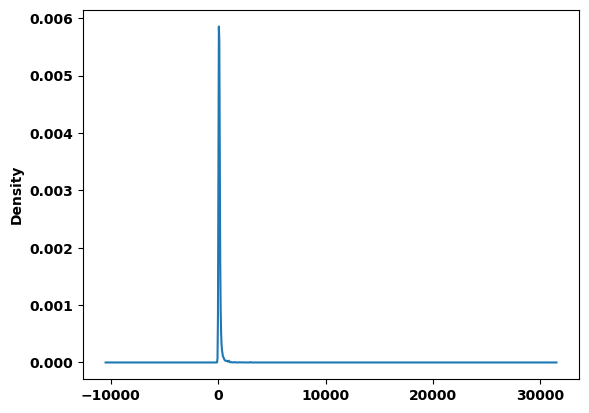

In [56]:
listings.price.plot.kde()

- Revisamos los máximos

In [ ]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price>1000].value_counts().sort_index().plot.bar()
plt.xticks(size=12);

- Revisamos los mínimos

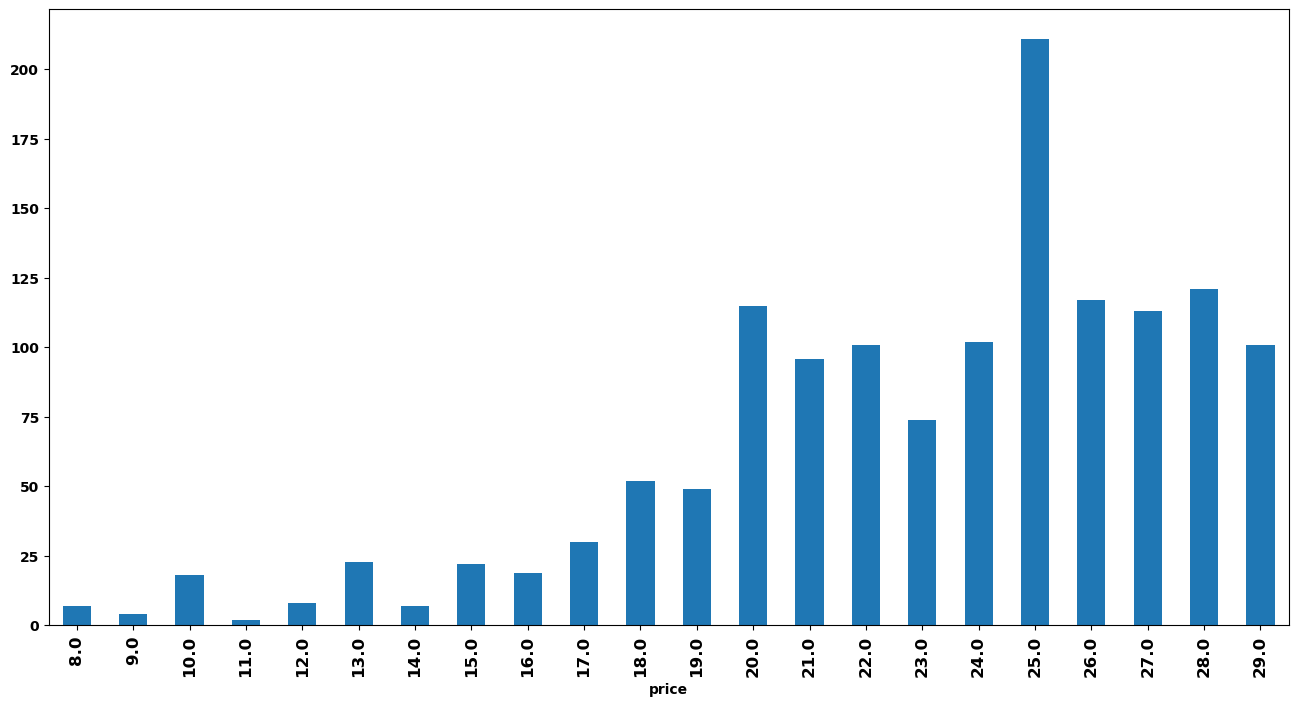

In [57]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price<30].value_counts().sort_index().plot.bar()
plt.xticks(size=12);

- Descartamos los inmuebles que se alquilen por debajo de 20€ la noche

In [58]:
listings = listings.loc[listings.price>19]


**Analisis del numero de habitaciones**

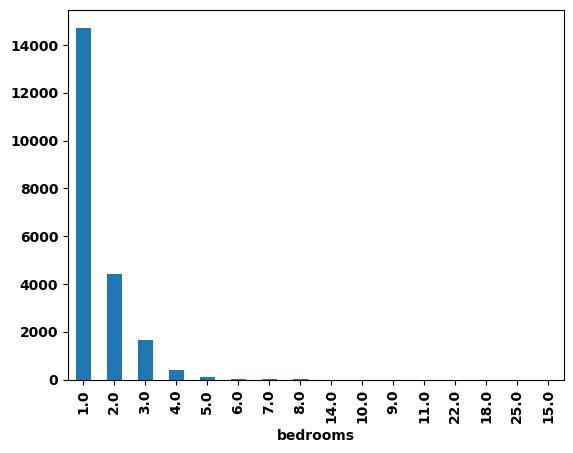

In [59]:
listings.bedrooms.value_counts().sort_values(ascending=False).plot.bar();

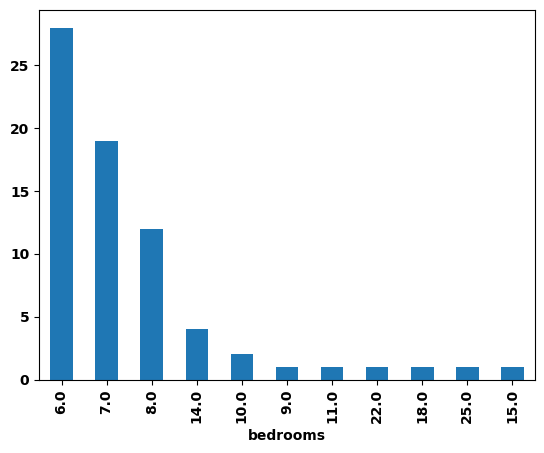

In [60]:
listings.loc[listings.bedrooms > 5].bedrooms.value_counts().sort_values(ascending=False).plot.bar();

**Analisis del numero de baños**

<Axes: xlabel='bathrooms'>

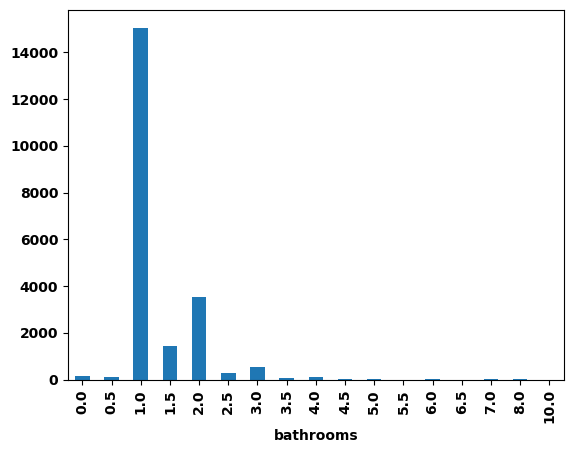

In [61]:
listings.bathrooms.value_counts().sort_index().plot.bar()

### Tabla listings detalle

In [62]:
pd.options.display.max_columns = None
listings_det.head()

,index,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,6369,https://www.airbnb.com/rooms/6369,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,NaN,None,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within an hour,100%,78%,t,https://a0.muscache.com/im/pictures/user/79a63...,https://a0.muscache.com/im/pictures/user/79a63...,Hispanoamérica,1.0,1.0,"['email', 'phone']",t,t,None,Hispanoamérica,Chamartín,40.45724,-3.67688,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,1.0,[],$85.00,5,1125,3,5,1125,1125,5.0,1125.0,NaN,t,8,11,11,22,2023-12-15,106,4,0,2010-03-14,2023-10-16,4.88,4.91,4.84,4.78,4.86,4.84,4.86,None,f,1,0,1,0,0.63
1,1,21853,https://www.airbnb.com/rooms/21853,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,NaN,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,None,None,0%,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Spain",Cármenes,Latina,40.40381,-3.74130,Private room in rental unit,Private room,1,NaN,1 bath,NaN,1.0,[],$31.00,4,40,4,4,40,40,4.0,40.0,NaN,t,0,0,0,135,2023-12-15,33,0,0,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,None,f,2,0,2,0,0.30
2,2,24805,https://www.airbnb.com/rooms/24805,20231215032748,2023-12-15,city scrape,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,NaN,"The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,Alvaro,2020-05-15,None,None,None,None,None,f,https://a0.muscache.com/im/pictures/user/d3167...,https://a0.muscache.com/im/pictures/user/d3167...,None,1.0,1.0,"['email', 'phone']",t,t,"Madrid, Spain",Universidad,Centro,40.42183,-3.70529,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,1.0,[],$94.00,5,1125,5,5,1125,1125,5.0,1125.0,NaN,t,18,48,78,168,2023-12-15,33,8,0,2014-11-29,2023-11-06,4.91,4.91,4.85,5.00,4.97,5.00,4.76,None,f,1,1,0,0,0.30
3,3,26825,https://www.airbnb.com/rooms/26825,20231215032748,2023-12-15,city scrape,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,NaN,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,Maria,2010-04-27,"Madrid, Spain","I like Fine art, Photography, Cinema, travel a...",a few days

In [63]:
listings.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365', 'bedrooms',
       'bathrooms'],
      dtype='object')

In [64]:
listings_det.columns

Index(['index', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_

#### Variables y data types

- Seleciconamos las variables que nos interesan para el proyecto

In [65]:
to_include = ["id","description","host_is_superhost","accommodates", "bathrooms", "bedrooms", "beds", 
             "number_of_reviews", "review_scores_rating", "review_scores_communication", 
             "review_scores_location"]

listings_det = listings_det.loc[:, to_include]


- Analisis de los tipos de variables. 

In [66]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25543 entries, 0 to 25542
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           25543 non-null  int64  
 1   description                  0 non-null      float64
 2   host_is_superhost            25363 non-null  object 
 3   accommodates                 25543 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bedrooms                     0 non-null      float64
 6   beds                         25238 non-null  float64
 7   number_of_reviews            25543 non-null  int64  
 8   review_scores_rating         20216 non-null  float64
 9   review_scores_communication  20215 non-null  float64
 10  review_scores_location       20212 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 2.1+ MB


In [67]:
listings_det["host_is_superhost"] = listings_det["host_is_superhost"].astype("category")

In [68]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25543 entries, 0 to 25542
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           25543 non-null  int64   
 1   description                  0 non-null      float64 
 2   host_is_superhost            25363 non-null  category
 3   accommodates                 25543 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     0 non-null      float64 
 6   beds                         25238 non-null  float64 
 7   number_of_reviews            25543 non-null  int64   
 8   review_scores_rating         20216 non-null  float64 
 9   review_scores_communication  20215 non-null  float64 
 10  review_scores_location       20212 non-null  float64 
dtypes: category(1), float64(7), int64(3)
memory usage: 2.0 MB


#### Analisis de nulos

In [69]:
listings_det.isna().sum()

id                                 0
description                    25543
host_is_superhost                180
accommodates                       0
bathrooms                      25543
bedrooms                       25543
beds                             305
number_of_reviews                  0
review_scores_rating            5327
review_scores_communication     5328
review_scores_location          5331
dtype: int64

- En el dataset listings detallado no contiene información acerca del numero de baños y de habitaciones. Por ello hemos extraido esta informacion de la variable name del dataset de lintings. 
- La variable descripción está vacía y no aporta información

- Intentamos imputar los nulos en el numero de camas con la variable accomodates que utilizamos como proxy, que indica el numero de personas que se aceptan en la vivienda. 

In [70]:
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
1.0,3668,7487,553,730,21,24,2,1,0,5,0,0,0,0,0,1
2.0,151,1196,1651,3469,147,152,3,10,0,1,0,0,1,0,0,1
3.0,32,80,277,1218,565,888,35,32,0,2,0,0,0,0,0,0
4.0,38,39,22,282,276,654,126,187,8,4,0,1,0,0,0,0
5.0,10,5,3,25,68,181,91,120,22,43,1,4,0,0,0,0
6.0,21,4,4,5,7,65,18,86,13,34,7,15,0,2,0,0
7.0,2,0,0,1,1,7,10,22,17,20,3,11,1,4,0,0
8.0,11,8,1,1,1,4,0,20,6,20,2,10,3,2,0,1
9.0,0,1,0,0,0,0,0,3,5,10,1,4,0,2,1,3


- Si la vivienda acomoda a 1 o 2 personas se suele corresponder con que el piso tenga una cama 
- Si la vivienda acomoda a 3 o 4 personas el valor que suele corresponder es que el piso tenga 2 camas
- Si la vivienda acomoda a 5 o 6 personas el valor mas frecuente es que el piso tenga 3 camas
- Si el piso acomoda a mas de 6 personas vamos a estimar que el piso tiene 4 camas

In [71]:
listings_det.beds.value_counts(dropna=False)

beds
1.0     12492
2.0      6782
3.0      3129
4.0      1637
5.0       573
NaN       305
6.0       281
7.0        99
8.0        90
10.0       59
12.0       31
9.0        30
11.0        9
14.0        8
20.0        6
13.0        5
16.0        3
17.0        1
15.0        1
40.0        1
30.0        1
Name: count, dtype: int64

In [72]:
def imputar_nulos(registro): 
    #lista de condiciones
    condiciones =[(registro.accommodates <=2),
                  (registro.accommodates>2) & (registro.accommodates<=4), 
                 (registro.accommodates >4)&(registro.accommodates<=6), 
                 (registro.accommodates >6)]
    #lista de resultados
    resultados = [1, 2, 3, 4]
    
    return (np.select(condiciones, resultados, default= -999))

In [73]:
listings_det.loc[listings_det.beds.isna(), "beds"] = listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis=1).astype(int)

In [74]:
listings_det.beds.value_counts()

beds
1.0     12730
2.0      6834
3.0      3140
4.0      1641
5.0       573
6.0       281
7.0        99
8.0        90
10.0       59
12.0       31
9.0        30
11.0        9
14.0        8
20.0        6
13.0        5
16.0        3
17.0        1
15.0        1
40.0        1
30.0        1
Name: count, dtype: int64

#### Analisis de duplicados

In [75]:
listings_det.duplicated().sum()

0

#### Analisis de variables categoricas

In [76]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25543 entries, 0 to 25542
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           25543 non-null  int64   
 1   description                  0 non-null      float64 
 2   host_is_superhost            25363 non-null  category
 3   accommodates                 25543 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     0 non-null      float64 
 6   beds                         25543 non-null  float64 
 7   number_of_reviews            25543 non-null  int64   
 8   review_scores_rating         20216 non-null  float64 
 9   review_scores_communication  20215 non-null  float64 
 10  review_scores_location       20212 non-null  float64 
dtypes: category(1), float64(7), int64(3)
memory usage: 2.0 MB


In [77]:
listings_det.host_is_superhost.value_counts()

host_is_superhost
f    19676
t     5687
Name: count, dtype: int64

#### Analisis de variables numéricas

In [78]:
listings_det.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
id,25543.0,4.159907e+17,4.324774e+17,6369.0,31148623.50,53976090.00,8.698655e+17,1.046255e+18
description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,25543.0,3.126727e+00,1.920497e+00,1.0,2.00,2.00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,25543.0,1.962338e+00,1.450671e+00,1.0,1.00,2.00,2.000000e+00,4.000000e+01
number_of_reviews,25543.0,4.286904e+01,8.104807e+01,0.0,1.00,10.00,4.600000e+01,9.940000e+02
review_scores_rating,20216.0,4.640384e+00,4.836087e-01,0.0,4.53,4.75,4.920000e+00,5.000000e+00
review_scores_communication,20215.0,4.759503e+00,4.435415e-01,1.0,4.72,4.89,5.000000e+00,5.000000e+00
review_scores_location,20212.0,4.746825e+00,3.948586e-01,1.0,4.67,4.88,4.990000e+00,5.000000e+00


- El numero maximo de camas es 40 y resulta extraño pero hemos comprobado que es para hoteles, por lo que tiene sentido, pero no los vamos aincluir en nuestroa analisis. 



In [79]:
listings_det.drop(columns= ["description", "bathrooms", "bedrooms"], inplace=True)

In [80]:
listings_det.head()

,id,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,t,2,1.0,106,4.88,4.86,4.84
1,21853,f,1,1.0,33,4.58,4.82,4.21
2,24805,f,3,1.0,33,4.91,4.97,5.00
3,26825,t,1,1.0,196,4.72,4.72,4.73
4,30320,f,2,2.0,172,4.63,4.78,4.90


## Tablon Analítico

- Tablas disponibles: 
    1) listings
    2) listings_det
    3) precio_m2

La tabla principal es listings, ya que lo que hace listings_det es aportar detalles adicionales. Por tanto la tabla que manda en la integración de datos es Listings, y las cruzaremos por la variable id. 

La tabla precio_m2, comparte el campo del distrito (neighbourhood_group), aunque para integrarla al tablón analítico debemos revisar primero si los literales de los distritos son exactamente iguales en ambas tablas. 



In [81]:
for cada in [listings, listings_det]:
    print(cada.shape)

(21387, 14)
(25543, 8)


In [82]:
df = pd.merge(left=listings, right=listings_det, how="left", on="id")


In [83]:
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.0,5,1,22,1.0,1.0,t,2,1.0,106,4.88,4.86,4.84
1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.0,5,3,0,1.0,1.0,f,2,2.0,172,4.63,4.78,4.90
2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,2,135,1.0,1.0,f,1,1.0,33,4.58,4.82,4.21
3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.0,5,1,168,6.0,1.0,f,3,1.0,33,4.91,4.97,5.00
4,26825,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29.0,3,1,295,1.0,1.5,t,1,1.0,196,4.72,4.72,4.73


In [84]:
df.neighbourhood_group.unique().categories

Index(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'],
      dtype='object')

In [85]:
precio_m2.distrito.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral', 'Hortaleza', 'Latina',
       'Moncloa', 'Moratalaz', 'Puente de Vallecas', 'Retiro',
       'Salamanca', 'San Blas', 'Tetuán', 'Usera', 'Vicálvaro',
       'Villa de Vallecas', 'Villaverde'], dtype=object)

In [86]:
precio_m2["distrito"] = precio_m2.distrito.map({"Fuencarral":"Fuencarral - El Pardo", 
                        "Moncloa":"Moncloa - Aravaca",
                        "San Blas":"San Blas - Canillejas"})\
                    .fillna(precio_m2.distrito)


In [87]:
precio_m2.distrito.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'], dtype=object)

In [88]:
df.shape

(21387, 21)

In [89]:
precio_m2.shape

(21, 2)

In [90]:
df = pd.merge(left=df, right=precio_m2, how="left", left_on="neighbourhood_group", right_on="distrito")

In [91]:
df.drop(columns="distrito", inplace=True)

## Guardar tabla en la base de datos

- Guardamos nuestra tabla final en la base de datos airbnb.db

In [92]:
import sqlalchemy as sa

con = sa.create_engine("sqlite:///Datos2023/airbnb.db")

df.to_sql("df", con=con, if_exists="replace")

21387

In [ ]:
from sqlalchemy import inspect

ins = inspect(con)
tablas = ins.get_table_names()
tablas

# Preparacion de datos 

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#Automcompletar rápido
%config IPCompleter.greedy=True

import sqlalchemy as sa

## Importacion de datos

In [94]:
con = sa.create_engine("sqlite:///Datos2023/airbnb.db")


In [95]:
df = pd.read_sql("df", con=con)

In [96]:
pd.options.display.max_columns=None
df

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2
0,0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,85.0,5,1,22,1.0,1.0,t,2,1.0,106,4.88,4.86,4.84,6039
1,1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Centro,Sol,40.414760,-3.704180,Entire home/apt,65.0,5,3,0,1.0,1.0,f,2,2.0,172,4.63,4.78,4.90,6144
2,2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4,2,135,1.0,1.0,f,1,1.0,33,4.58,4.82,4.21,2699
3,3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,94.0,5,1,168,6.0,1.0,f,3,1.0,33,4.91,4.97,5.00,6144
4,4,26825,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29.0,3,1,295,1.0,1.5,t,1,1.0,196,4.72,4.72,4.73,4595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21382,21382,1046219783290634155,Rental unit in Madrid · ★New · 2 bedrooms · 3 ...,529402573,Usera,Zofío,40.384658,-3.714106,Entire home/apt,120.0,1,56,303,2.0,1.0,f,4,3.0,0,NaN,NaN,NaN,2368
21383,21383,1045519419976898566,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,529402573,Salamanca,Guindalera,40.438832,-3.671323,Entire home/apt,120.0,1,56,189,1.0,1.0,f,2,1.0,0,NaN,NaN,NaN,7374
21384,21384,1046222300986271054,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,31772865,Tetuán,Castillejos,40.458234,-3.695566,Entire home/apt,171.0,1,42,318,1.0,1.0,f,2,1.0,0,NaN,NaN,NaN,4344
21385,21385,1046239141714406672,Rental unit in Madrid · ★New · 2 bedrooms · 4 ...,346367515,Chamberí,Arapiles,40.433040,-3.711060,Entire home/apt,74.0,31,237,326,2.0,1.0,f,4,4.0,0,NaN,NaN,NaN,6347


## Preparacion de variables

### Creacion de KPIs sobre las palancas identificadas

Primero vamos a crear las variables de análisis, es decir las que habíamos identificado como los Kpis que usaremos en las palancas que influyen sobre el negocio.

Habíamos identificado 3 palancas:

* **precio por noche**: La tenemos directamente en la variable price, pero vamos a revisarla para ver que la entendemos bien
* **ocupación**: tenemos availability_365 pero hay que transformarla
* **precio del inmueble**: Tendremos que crearla con variables externas
    

#### Analisis del precio por noche

La documentación no aclara si el precio es por todo el inmueble, o si en el caso de que se alquile una habitación es por habitación.

Es un dato clave para poder hacer la valoración de los potenciales ingresos de un inmueble.

Vamos a intentar entenderlo analizando el precio medio por tipo de alquiler.

Es importante filtrar por solo un distrito para no incluir el efecto "zona".

Nos quedamos con el distrito centro, que es el que más datos tiene. 

In [97]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Centro                   9324
Salamanca                1463
Chamberí                 1433
Tetuán                   1189
Arganzuela               1016
Carabanchel               760
Retiro                    749
Ciudad Lineal             681
Chamartín                 648
Puente de Vallecas        591
Latina                    576
Usera                     561
Moncloa - Aravaca         514
Hortaleza                 461
San Blas - Canillejas     456
Fuencarral - El Pardo     303
Villaverde                210
Barajas                   146
Moratalaz                 126
Villa de Vallecas         103
Vicálvaro                  77
Name: count, dtype: int64

In [98]:
df.loc[df.neighbourhood_group=="Centro"].groupby("room_type").price.mean()

room_type
Entire home/apt    152.601012
Private room        94.217582
Shared room         95.751351
Studio             101.781250
Name: price, dtype: float64

- Alquilar un apartamento en el centro tiene un precio medio de 147€
- Alquilar una habitación privada y compartida tienen un precio medio de 95€, nos resulta algo extraño por lo que seguimos analizando. 

In [99]:
df.room_type.value_counts()

room_type
Entire home/apt    13208
Private room        6390
Studio              1488
Shared room          301
Name: count, dtype: int64

* Distritos en los que el precio por noche de la habitación compartida es mayor que el precio por habotación privada o por apartamento. 

In [100]:
precio_medio_por_tipo_y_distrito = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

# Filtrar para obtener solo los distritos donde el precio de habitación compartida es mayor que el de habitación privada o apartamento entero
distritos_precio_compartida_mayor_privada = precio_medio_por_tipo_y_distrito[precio_medio_por_tipo_y_distrito['Shared room'] > precio_medio_por_tipo_y_distrito['Private room']]
distritos_precio_compartida_mayor_apartamento = precio_medio_por_tipo_y_distrito[precio_medio_por_tipo_y_distrito['Shared room'] > precio_medio_por_tipo_y_distrito['Entire home/apt']]

# Mostrar los resultados
print("Distritos donde el precio de habitación compartida es mayor que el de habitación privada:")
print(distritos_precio_compartida_mayor_privada)

print("\nDistritos donde el precio de habitación compartida es mayor que el de apartamento entero:")
print(distritos_precio_compartida_mayor_apartamento)


Distritos donde el precio de habitación compartida es mayor que el de habitación privada:
room_type              Entire home/apt  Private room  Shared room      Studio
neighbourhood_group                                                          
Arganzuela                  142.213008     63.403030   295.625000   78.600000
Carabanchel                 110.960894     52.865922    83.600000   73.641026
Centro                      152.601012     94.217582    95.751351  101.781250
Chamartín                   140.797136    118.258883   249.500000  105.100000
Chamberí                    161.430939     86.276744   241.000000   89.777778
Ciudad Lineal               131.371795     90.548589   128.000000  181.675000
Latina                       96.686695     84.405751   264.166667   95.458333
Puente de Vallecas          187.842742     56.552632   534.750000   71.419355
Salamanca                   186.676498     80.467857   166.400000  102.516129
San Blas - Canillejas       234.461957    220.173387

In [101]:
distritos_especificos = ["Arganzuela", "Carabanchel", "Chamartín", "Chamberí","Ciudad Lineal","Latina","Puente de Vallecas","Salamanca","San Blas - Canillejas","Usera","Villa de Vallecas"]

df_filtrado = df[df['neighbourhood_group'].isin(distritos_especificos)]

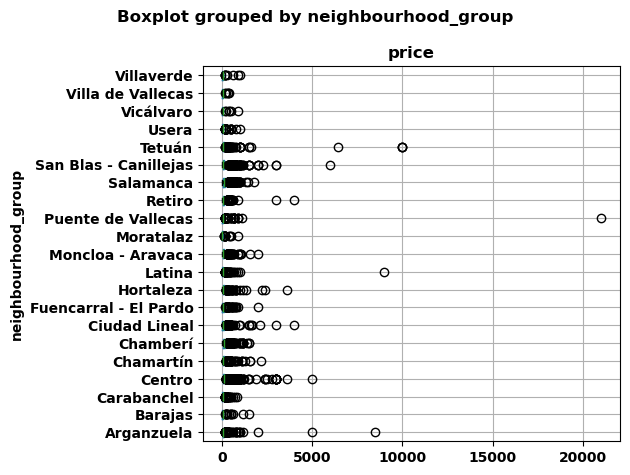

In [102]:
boxplot = df.boxplot(column="price", by="neighbourhood_group", vert=False)

plt.tight_layout()

plt.show()

In [103]:
df_filtrado.loc[(df_filtrado['room_type'] == "Shared room") & (df_filtrado['price'] >100)][["neighbourhood_group", "bedrooms", "price"]]


,neighbourhood_group,bedrooms,price
3808,Ciudad Lineal,1.0,200.0
4833,Chamberí,1.0,200.0
4868,Carabanchel,1.0,250.0
4977,Latina,1.0,900.0
5069,San Blas - Canillejas,1.0,250.0
5190,Chamartín,1.0,450.0
5222,San Blas - Canillejas,1.0,1000.0
5245,Chamberí,1.0,1500.0
5295,Ciudad Lineal,1.0,400.0
5524,Arganzuela,1.0,370.0


In [104]:
df_filtrado.loc[(df_filtrado['room_type'] == "Private room") & (df_filtrado['price'] >1500)][["neighbourhood_group", "bedrooms", "price"]]


,neighbourhood_group,bedrooms,price
2314,Salamanca,1.0,1788.0
4859,Ciudad Lineal,1.0,2100.0
5005,Ciudad Lineal,3.0,1700.0
5009,San Blas - Canillejas,2.0,3000.0
5173,San Blas - Canillejas,3.0,2000.0
9147,Chamartín,1.0,1570.0
9150,Chamartín,1.0,1570.0
11184,Latina,1.0,9000.0
12118,Ciudad Lineal,1.0,4000.0


In [105]:
df = df.loc[~((df['room_type'] == "Shared room") & (df['price'] > 100) & (df["bedrooms"] <= 1))]

In [106]:
df= df.loc[~((df['room_type'] == "Private room") & (df['price'] > 1500) & (df["bedrooms"] <= 1))]

In [107]:
df.groupby(["neighbourhood_group", "room_type"])["price"].mean()

neighbourhood_group  room_type      
Arganzuela           Entire home/apt    142.213008
                     Private room        63.403030
                     Shared room         39.750000
                     Studio              78.600000
Barajas              Entire home/apt    142.022222
                                           ...    
Villa de Vallecas    Studio              76.000000
Villaverde           Entire home/apt     97.547945
                     Private room        62.164062
                     Shared room         33.000000
                     Studio              55.125000
Name: price, Length: 79, dtype: float64

- En algunos distritos, notamos que el precio medio por habitación compartida es significativamente más alto que el precio por habitación privada e incluso por apartamento completo. Este fenómeno puede ser atribuido a datos atípicos, como alquileres con precios muy elevados debido a su ubicación cercana a puntos de interés o eventos.

- Para proseguir con el análisis, procedemos a filtrar los registros donde el precio por noche por habitación compartida en viviendas de una o ninguna habitación sea superior a 100€, así como los registros donde el precio por habitación privada sea superior a 1500€ la noche en viviendas con una o ninguna habitación.

**Calculo del precio total del apartamento por noche**

Multiplicar el precio por el total de habitaciones puede sesgar al alza la capacidad de generar ingresos de un inmueble.

Ya que si se alquila por habitaciones no es probable que siempre esté al 100%

Por tanto deberíamos ponderarlo por el porcentaje medio de habitaciones alquiladas.

No tenemos ese dato, pero suponemos que hemos hablado con el responsable de negocio y nos ha dicho que es del 70%.

Creamos la variable precio total aplicando apply sobre una función personalizada.

In [108]:
def precio_total(registro):
    if (registro.bedrooms > 1) & ((registro.room_type == "Private room") | (registro.room_type == "Shared room")):
        result = registro.price * registro.bedrooms * 0.7
    else: 
        result = registro.price
        
    return result

df["precio_total"] = df.apply(precio_total, axis=1)

In [109]:
(df[["name","neighbourhood_group", "room_type", "price", "bedrooms", "precio_total"]]
.loc[df.room_type != "Entire home/apt"].head(20))

,name,neighbourhood_group,room_type,price,bedrooms,precio_total
0,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,Chamartín,Private room,85.0,1.0,85.0
2,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,Latina,Private room,31.0,1.0,31.0
4,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,Arganzuela,Private room,29.0,1.0,29.0
11,Rental unit in Madrid · ★4.60 · 1 bedroom · 2 ...,Centro,Private room,73.0,1.0,73.0
16,Rental unit in Madrid · ★4.55 · 1 bedroom · 1 ...,Centro,Private room,49.0,1.0,49.0
19,Rental unit in Madrid · ★4.42 · Studio · 1 bed...,Centro,Studio,67.0,1.0,67.0
20,Rental unit in Madrid · ★4.66 · 1 bedroom · 1 ...,Arganzuela,Private room,33.0,1.0,33.0
28,Rental unit in Madrid · ★4.96 · 1 bedroom · 2 ...,Salamanca,Private room,29.0,1.0,29.0
29,Rental unit in Madrid · ★4.57 · Studio · 1 bed...,Centro,Studio,80.0,1.0,80.0
33,Rental unit in Madrid · ★4.75 · Studio · 2 bed...,Centro,Studio,129.0,1.0,129.0


### Analisis de la variable ocupación

In [110]:
df.availability_365.head()

0     22
1      0
2    135
3    168
4    295
Name: availability_365, dtype: int64

In [111]:
df["ocupacion"] = (((365 - df.availability_365) / 365)*100).astype("float").round(1)

In [112]:
df[["availability_365", "ocupacion"]]

,availability_365,ocupacion
0,22,94.0
1,0,100.0
2,135,63.0
3,168,54.0
4,295,19.2
...,...,...
21382,303,17.0
21383,189,48.2
21384,318,12.9
21385,326,10.7


## Transfomarcion de variables de analisis

Normalmente podremos hacer mejor estos análisis si discretizamos la variable de análisis.

En nuestro caso las candidatas para este análisis son: accommodates, bedrooms, beds y number_of_reviews.

En bedrooms tiene sentido una discretización más personalizada. En las otras podemos hacerla automática.

**Discretizar Bedrooms**

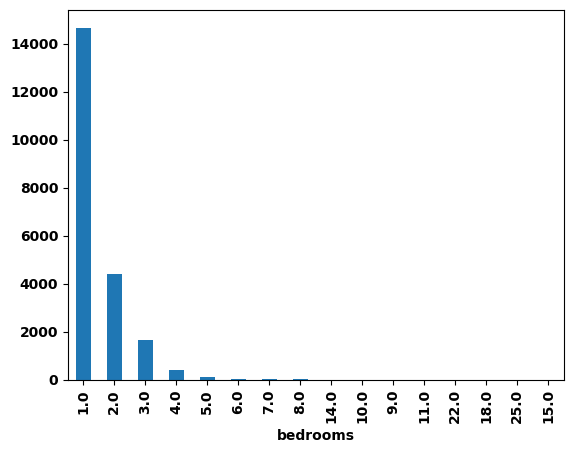

In [113]:
df.bedrooms.value_counts().plot.bar();

In [114]:
condiciones = [df.bedrooms ==1, 
               df.bedrooms ==2, 
               df.bedrooms ==3, 
               df.bedrooms >=4]

resultados = ["01_Una", "02_Dos", "03_Tres", "04_Cuatro_o_mas"]

df["bedrooms_disc"] = np.select(condiciones, resultados, default=-999)

**Discetizar Accommodates**

Pasándole los percentiles: 
- df[var1_disc’] = pd.qcut(df['var1 '], [0, 0.5,1]))

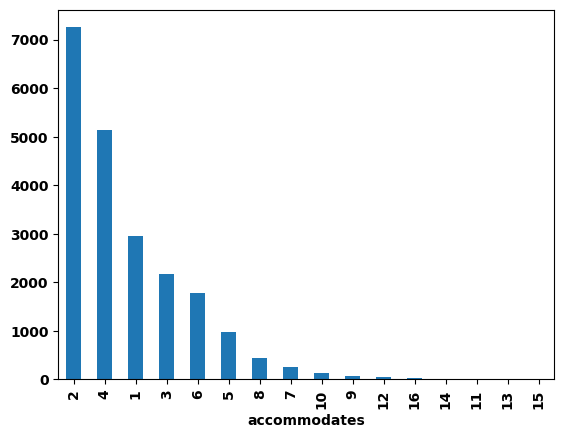

In [115]:
df.accommodates.value_counts().plot.bar();

<Axes: xlabel='accommodates'>

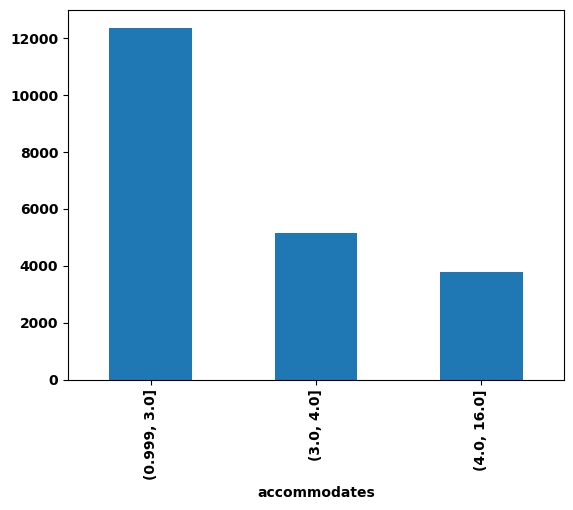

In [116]:
pd.qcut(df["accommodates"], [0, 0.5, 0.8, 1]).value_counts().plot.bar()

In [117]:
df["accommodates_disc"] = pd.qcut(df["accommodates"], [0, 0.5, 0.8, 1], 
       labels = ['0-3','4','5-16'])

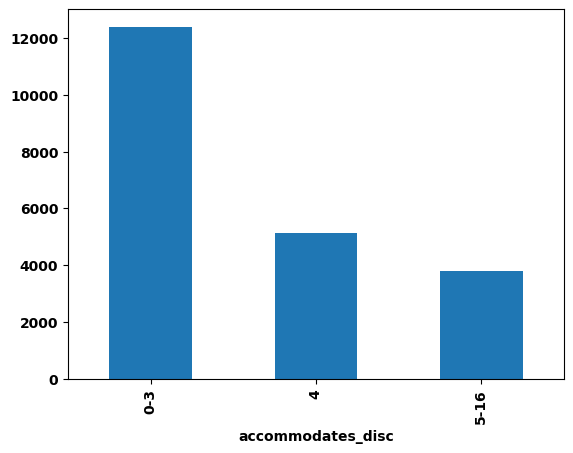

In [118]:
df.accommodates_disc.value_counts().plot.bar();

**Discretizar beds**

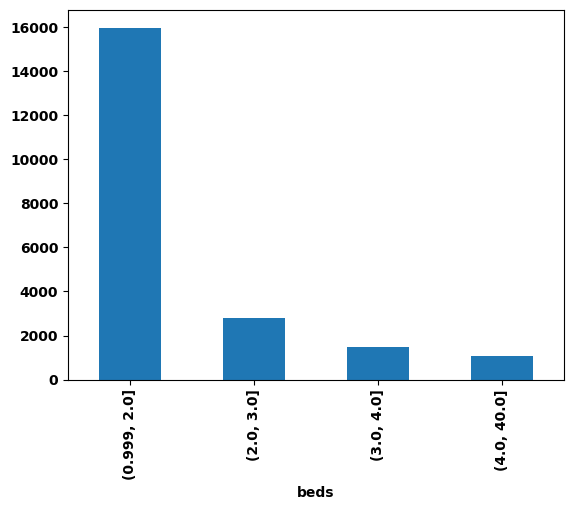

In [119]:
pd.qcut(df["beds"], [0, 0.25,0.5, 0.75, 0.9, 1], duplicates="drop").value_counts().plot.bar();

In [121]:
df["beds_disc"] = pd.qcut(df["beds"], [0, 0.25,0.5, 0.75, 0.9, 1],
        duplicates="drop",
       labels = ['1','2','3','4-39'])

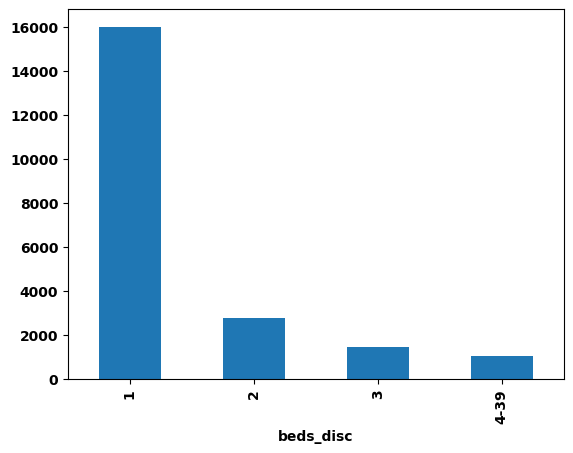

In [122]:
df.beds_disc.value_counts().plot.bar();

**Discretizar number_of_reviews**

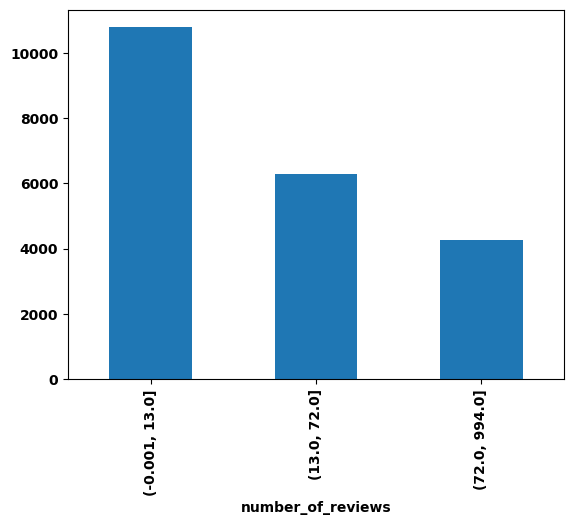

In [123]:
pd.qcut(df["number_of_reviews"], [0, 0.5, 0.8, 1]).value_counts().plot.bar();

In [124]:
df["number_of_reviews_disc"] = pd.qcut(df["number_of_reviews"], [0, 0.5, 0.8, 1], 
       labels = ['0-5','6-29','30-297'])

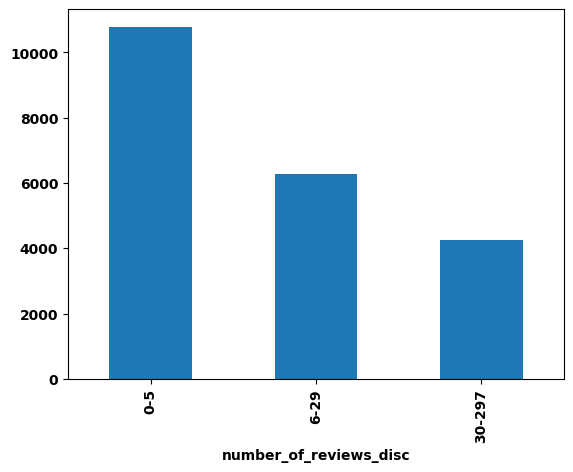

In [125]:
df.number_of_reviews_disc.value_counts().plot.bar();

**Discretizar Ocupación**

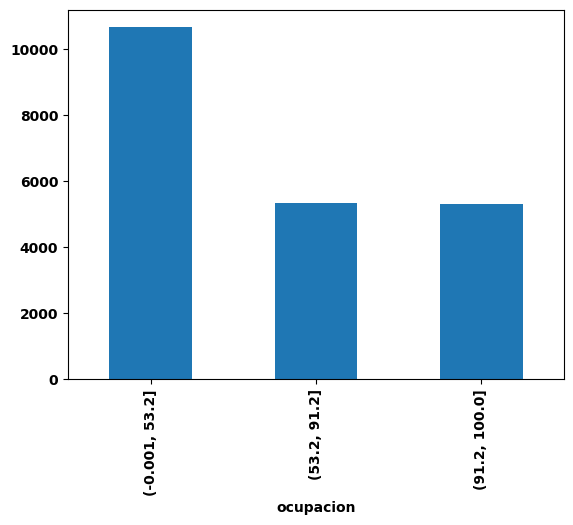

In [126]:
pd.qcut(df["ocupacion"], [0,0.5, 0.75, 1],
        duplicates="drop").value_counts().sort_values(ascending=False).plot.bar();

In [127]:
df["ocupacion_disc"] = pd.qcut(df["ocupacion"], [0, 0.5, 0.75, 1], 
       labels = ['00_0%-52%','01_53%-90%','02_91%-100%'])

## Creacion de variables con datos externos

- Estimacion del precio del inmueble

Para ello necesitamos estimar los metros cuadrados que tiene cada vivienda, ya que el precio por metro cuadrado ya lo tenemos cargado en nuestra base de datos obtenido de idealista

In [128]:
pd.crosstab(df.bathrooms, df.bedrooms)

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,14.0,15.0,18.0,22.0,25.0
bathrooms,,,,,,,,,,,,,,,,
0.0,130,7,3,0,0,0,0,1,0,0,0,0,0,0,0,0
0.5,119,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1.0,12095,2394,445,55,8,2,3,4,1,1,1,1,0,0,1,1
1.5,1114,231,83,20,1,0,0,0,0,0,0,0,0,1,0,0
2.0,853,1653,817,151,43,11,1,1,0,0,0,0,0,0,0,0
2.5,94,73,73,23,5,0,0,1,0,0,0,0,0,0,0,0
3.0,170,43,206,81,24,0,3,0,0,0,0,0,0,0,0,0
3.5,7,1,22,16,2,0,0,0,0,0,0,0,0,0,0,0
4.0,42,1,12,37,15,4,2,2,0,0,0,0,0,0,0,0


- viviendas de 0 a 2 habitaciones: el valor mas comun es un baño
- viviendas de 3 a 6 habitaciones: el valor mas comun son 2 baños
- Viviendas de 7 habitaciones: El valor mas comun son 3 baños 

Estimación de los metros cuadrados del inmueble

Vamos usar el siguiente algoritmo:

- una habitación: m2 = 60
- dos habitaciones: m2 = 70
- tres habitaciones: m2 = 90
- cuatro habitaciones: m2 = 120
- cinco o más habitaciones: m2 = 150

In [129]:
condiciones = [df.bedrooms==1, 
              df.bedrooms==2, 
              df.bedrooms==3, 
              df.bedrooms==4, 
              df.bedrooms>4]
resultados = [60,70,90,120,150]

df["metros_2"] = np.select(condiciones, resultados, default=-999)

In [130]:
df.metros_2.value_counts()

metros_2
60     14667
70      4406
90      1664
120      394
150      188
Name: count, dtype: int64

In [131]:
df["precio_compra"] = df.metros_2 * df.precio_m2

In [132]:
df.columns

Index(['index', 'id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'bedrooms', 'bathrooms', 'host_is_superhost', 'accommodates', 'beds',
       'number_of_reviews', 'review_scores_rating',
       'review_scores_communication', 'review_scores_location', 'precio_m2',
       'precio_total', 'ocupacion', 'bedrooms_disc', 'accommodates_disc',
       'beds_disc', 'number_of_reviews_disc', 'ocupacion_disc', 'metros_2',
       'precio_compra'],
      dtype='object')

In [133]:
(df[["name","neighbourhood_group", "room_type", "price", 
    "bedrooms", "bathrooms","precio_m2", "metros_2", "precio_compra"]].head(20))

,name,neighbourhood_group,room_type,price,bedrooms,bathrooms,precio_m2,metros_2,precio_compra
0,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,Chamartín,Private room,85.0,1.0,1.0,6039,60,362340
1,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,Centro,Entire home/apt,65.0,1.0,1.0,6144,60,368640
2,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,Latina,Private room,31.0,1.0,1.0,2699,60,161940
3,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,Centro,Entire home/apt,94.0,6.0,1.0,6144,150,921600
4,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,Arganzuela,Private room,29.0,1.0,1.5,4595,60,275700
5,Rental unit in Madrid · ★4.63 · 2 bedrooms · 3...,Centro,Entire home/apt,90.0,2.0,1.0,6144,70,430080
6,Rental unit in Madrid · ★4.61 · 1 bedroom · 2 ...,Centro,Entire home/apt,106.0,1.0,1.0,6144,60,368640
7,Rental unit in Madrid · ★4.65 · 1 bedroom · 3 ...,Centro,Entire home/apt,90.0,1.0,1.0,6144,60,368640
8,Rental unit in Madrid · ★4.89 · 1 bedroom · 2 ...,Centro,Entire home/apt,65.0,1.0,1.0,6144,60,368640
9,Rental unit in Madrid · ★4.88 · 1 bedroom · 2 ...,Centro,Entire home/apt,99.0,1.0,1.0,6144,60,368640


Al disponer de las variables x, y de la localización de cada inmueble, nos permite calcular distancias con puntos de interés de la ciudad de Madrid. 

Vamos a calcular la distancia de cada inmueble a la Puerta del Sol.

Para ello buscamos en Google su longitud y latitud: https://www.123coordenadas.com/coordinates/81497-puerta-del-sol-madrid

Latitud: 40.4167278 Longitud: -3.7033387

**Cálculo de la distancia de cada inmueble a la Puerta del Sol**

En el siguiente enlace encontramos una fórmula para calcular este tipo de distancias que adaptamos a nuestros datos. 
https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [134]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 #En km, si usas millas tienes que cambiarlo por 3959.87433

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [135]:
lat1 = 40.4167278
lon1 = -3.7033387

In [136]:
df["distancia_a_sol"] = df.apply(lambda registro: haversine(lat1, lon1, registro.latitude, registro.longitude), axis=1)

In [137]:
df.groupby("neighbourhood_group")["distancia_a_sol"].mean().sort_values()

neighbourhood_group
Centro                    0.723035
Arganzuela                1.912483
Chamberí                  2.132681
Retiro                    2.464352
Salamanca                 2.765321
Moncloa - Aravaca         3.426964
Latina                    3.765169
Carabanchel               3.855666
Usera                     3.954145
Puente de Vallecas        4.520202
Chamartín                 4.581853
Tetuán                    4.705894
Moratalaz                 5.017935
Ciudad Lineal             5.148085
Villaverde                7.645335
Fuencarral - El Pardo     7.953007
Hortaleza                 8.002169
San Blas - Canillejas     8.297441
Villa de Vallecas         9.315375
Vicálvaro                 9.371527
Barajas                  11.487938
Name: distancia_a_sol, dtype: float64

## Guardar el dataset en la base de datos 

In [138]:
df.to_sql("df_analisis", con, if_exists="replace")

21319

# Analisis e Insights

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy=True
pd.options.display.max_columns = None 

## Carga de datos

In [140]:
con = sa.create_engine("sqlite:///Datos2023/airbnb.db")
df_analisis = pd.read_sql("df_analisis", con)
df_analisis

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc,metros_2,precio_compra,distancia_a_sol
0,0,0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,85.0,5,1,22,1.0,1.0,t,2,1.0,106,4.88,4.86,4.84,6039,85.0,94.0,01_Una,0-3,1,30-297,02_91%-100%,60,362340,5.032039
1,1,1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Centro,Sol,40.414760,-3.704180,Entire home/apt,65.0,5,3,0,1.0,1.0,f,2,2.0,172,4.63,4.78,4.90,6144,65.0,100.0,01_Una,0-3,1,30-297,02_91%-100%,60,368640,0.230175
2,2,2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4,2,135,1.0,1.0,f,1,1.0,33,4.58,4.82,4.21,2699,31.0,63.0,01_Una,0-3,1,6-29,01_53%-90%,60,161940,3.521406
3,3,3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,94.0,5,1,168,6.0,1.0,f,3,1.0,33,4.91,4.97,5.00,6144,94.0,54.0,04_Cuatro_o_mas,0-3,1,6-29,01_53%-90%,150,921600,0.591065
4,4,4,26825,Home in Madrid · ★4.72 · 1 bedroom · 1 bed · 1...,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29.0,3,1,295,1.0,1.5,t,1,1.0,196,4.72,4.72,4.73,4595,29.0,19.2,01_Una,0-3,1,30-297,00_0%-52%,60,275700,3.200942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21314,21382,21382,1046219783290634155,Rental unit in Madrid · ★New · 2 bedrooms · 3 ...,529402573,Usera,Zofío,40.384658,-3.714106,Entire home/apt,120.0,1,56,303,2.0,1.0,f,4,3.0,0,NaN,NaN,NaN,2368,120.0,17.0,02_Dos,4,2,0-5,00_0%-52%,70,165760,3.681721
21315,21383,21383,1045519419976898566,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,529402573,Salamanca,Guindalera,40.438832,-3.671323,Entire home/apt,120.0,1,56,189,1.0,1.0,f,2,1.0,0,NaN,NaN,NaN,7374,120.0,48.2,01_Una,0-3,1,0-5,00_0%-52%,60,442440,3.659591
21316,21384,21384,1046222300986271054,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,31772865,Tetuán,Castillejos,40.458234,-3.695566,Entire home/apt,171.0,1,42,318,1.0,1.0,f,2,1.0,0,NaN,NaN,NaN,4344,171.0,12.9,01_Una,0-3,1,0-5,00_0%-52%,60,260640,4.663274
21317,21385,21385,1046239141714406672,Rental unit in Madrid · ★New · 2 bedrooms · 4 ...,346367515,Chamberí,Arapiles,40.433040,-3.711060,Entire home/apt,74.0,31,237,326,2.0,1.0,f,4,4.0,0,NaN,NaN,NaN,6347,74.0,10.7,02_Dos,4,3,0-5,00_0%-52%,70,444290,1.928543


## Analisis 

### Análisis del precio

**¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?**

**¿Cual es el ranking de distritos y barrios por precio medio de alquiler?**

In [141]:
df_analisis.precio_total.describe()

count    21319.000000
mean       131.470777
std        282.524045
min         20.000000
25%         60.000000
50%         91.000000
75%        138.000000
max      21000.000000
Name: precio_total, dtype: float64

- Vemos que hay al menos un atípico por la parte de arriba que sesga la media, ya que la desviación típica es más del doble de la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [142]:
df_analisis.precio_total.median()

91.0

In [143]:
df.groupby("neighbourhood_group")["precio_total"].median().sort_values(ascending=False)

neighbourhood_group
Salamanca                120.5
Centro                   103.0
Chamberí                 100.0
Moncloa - Aravaca         93.0
Chamartín                 93.0
Retiro                    91.0
Tetuán                    83.0
San Blas - Canillejas     82.0
Arganzuela                81.5
Hortaleza                 75.0
Fuencarral - El Pardo     69.0
Ciudad Lineal             65.0
Barajas                   60.5
Carabanchel               60.2
Usera                     58.0
Puente de Vallecas        57.0
Latina                    55.0
Villa de Vallecas         54.0
Villaverde                51.0
Vicálvaro                 49.0
Moratalaz                 38.5
Name: precio_total, dtype: float64

Vemos que hay al menos un atípico por la parte de arriba que sesga la media, ya que la desviación típica es más del doble de la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [144]:
df_analisis.loc[df_analisis.neighbourhood_group=="San Blas - Canillejas"].sort_values(by="precio_total", ascending=False)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc,metros_2,precio_compra,distancia_a_sol
5248,5273,5273,35149419,Chalet in Madrid · 4 bedrooms · 5 beds · 2 baths,143732655,San Blas - Canillejas,Canillejas,40.449370,-3.616330,Entire home/apt,6000.0,1,1,0,4.0,2.0,f,6,5.0,0,NaN,NaN,NaN,2863,6000.0,100.0,04_Cuatro_o_mas,5-16,4-39,0-5,02_91%-100%,120,343560,8.212429
5151,5173,5173,34933116,Chalet in Madrid · 3 bedrooms · 3 beds · 1.5 s...,263232278,San Blas - Canillejas,Simancas,40.439680,-3.619330,Private room,2000.0,2,1,0,3.0,1.5,f,5,3.0,0,NaN,NaN,NaN,2863,4200.0,100.0,03_Tres,5-16,2,0-5,02_91%-100%,90,257670,7.557076
4990,5009,5009,34826962,Rental unit in Madrid · 2 bedrooms · 3 beds · ...,222068421,San Blas - Canillejas,Arcos,40.419270,-3.615550,Private room,3000.0,1,1,0,2.0,1.5,f,4,3.0,0,NaN,NaN,NaN,2863,4200.0,100.0,02_Dos,4,2,0-5,02_91%-100%,70,200410,7.439364
4999,5018,5018,34836238,Home in Madrid · 2 bedrooms · 1 bed · 1 bath,262622230,San Blas - Canillejas,Simancas,40.438790,-3.614250,Entire home/apt,3000.0,1,1,0,2.0,1.0,f,4,1.0,0,NaN,NaN,NaN,2863,3000.0,100.0,02_Dos,4,1,0-5,02_91%-100%,70,200410,7.932095
5045,5066,5066,34970236,Home in Madrid · 5 bedrooms · 8 beds · 4 baths,263474389,San Blas - Canillejas,Arcos,40.419200,-3.612290,Private room,800.0,1,1,0,5.0,4.0,f,10,8.0,0,NaN,NaN,NaN,2863,2800.0,100.0,04_Cuatro_o_mas,5-16,4-39,0-5,02_91%-100%,150,429450,7.714952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,10016,10016,590435337953412287,Rental unit in Madrid · ★4.89 · 1 bedroom · 1 ...,262405800,San Blas - Canillejas,Simancas,40.427500,-3.628340,Private room,25.0,15,1,317,1.0,1.0,t,1,1.0,9,4.89,5.00,4.78,2863,25.0,13.2,01_Una,0-3,1,0-5,00_0%-52%,60,171780,6.462576
7320,7355,7355,46981393,Home in Madrid · ★4.07 · 1 bedroom · 1 bed · 1...,379040878,San Blas - Canillejas,Amposta,40.427230,-3.620200,Private room,24.0,2,1,363,1.0,1.0,f,2,1.0,75,4.07,4.27,4.04,2863,24.0,0.5,01_Una,0-3,1,30-297,00_0%-52%,60,171780,7.136063
19422,19489,19489,996179019688210848,Rental unit in Madrid · ★New · 1 bedroom · 1 b...,538923092,San Blas - Canillejas,Simancas,40.430870,-3.624799,Private room,22.0,1,1,88,1.0,1.0,f,1,1.0,0,NaN,NaN,NaN,2863,22.0,75.9,01_Una,0-3,1,0-5,01_53%-90%,60,171780,6.833685
942,952,952,7783777,Rental unit in Madrid · ★4.84 · 1 bedroom · 1 ...,40957790,San Blas - Canillejas,Arcos,40.423810,-3.617900,Private room,22.0,1,2,68,1.0,1.0,t,1,1.0,802,4.84,4.92,4.55,2863,22.0,81.4,01_Una,0-3,1,30-297,01_53%-90%,60,171780,7.277503


In [145]:
df_analisis.loc[df_analisis.precio_total >1000]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc,metros_2,precio_compra,distancia_a_sol
665,675,675,5420660,Rental unit in Madrid · 2 bedrooms · 3 beds · ...,1206817,Centro,Palacio,40.410850,-3.710700,Private room,1000.0,1,1,364,2.0,1.0,f,3,3.0,0,NaN,NaN,NaN,6144,1400.0,0.3,02_Dos,0-3,2,0-5,00_0%-52%,70,430080,0.903346
1457,1468,1468,12867848,Rental unit in Madrid · ★4.86 · 4 bedrooms · 6...,70358747,Arganzuela,Acacias,40.401070,-3.713060,Entire home/apt,1179.0,222,1,270,4.0,2.0,f,7,6.0,85,4.86,4.99,4.91,4595,1179.0,26.0,04_Cuatro_o_mas,5-16,4-39,30-297,00_0%-52%,120,551400,1.926364
1503,1514,1514,13484101,Rental unit in Madrid · 2 bedrooms · 1 bed · 2...,12455551,Moncloa - Aravaca,Argüelles,40.430040,-3.716990,Private room,1000.0,1,1,89,2.0,2.0,f,4,1.0,0,NaN,NaN,NaN,4700,1400.0,75.6,02_Dos,4,1,0-5,01_53%-90%,70,329000,1.878429
1536,1547,1547,13750696,Rental unit in Madrid · 1 bedroom · 1 bed · 1 ...,8275478,Chamberí,Arapiles,40.430330,-3.711420,Entire home/apt,1200.0,1,1,0,1.0,1.0,f,3,1.0,0,NaN,NaN,NaN,6347,1200.0,100.0,01_Una,0-3,1,0-5,02_91%-100%,60,380820,1.660471
1662,1673,1673,14418694,Floor in Madrid · ★4.88 · 1 bedroom · 1 bed · ...,15328893,Centro,Justicia,40.420740,-3.700700,Private room,1200.0,1,3,63,1.0,1.0,t,2,1.0,234,4.88,4.96,4.99,6144,1200.0,82.7,01_Una,0-3,1,30-297,01_53%-90%,60,368640,0.499076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15564,15624,15624,879532717088321380,Rental unit in Madrid · ★New · 4 bedrooms · 4 ...,354326052,Centro,Cortes,40.415769,-3.696206,Entire home/apt,1029.0,5,3,39,4.0,4.0,t,8,4.0,0,NaN,NaN,NaN,6144,1029.0,89.3,04_Cuatro_o_mas,5-16,3,0-5,01_53%-90%,120,737280,0.613352
18078,18143,18143,949842440822212072,Rental unit in Madrid · 2 bedrooms · 2 beds · ...,28038703,Moncloa - Aravaca,Argüelles,40.423360,-3.713329,Entire home/apt,1560.0,1,101,213,2.0,2.0,f,4,2.0,1,5.00,5.00,5.00,4700,1560.0,41.6,02_Dos,4,1,0-5,00_0%-52%,70,329000,1.122426
18354,18419,18419,957756434719193756,Rental unit in Madrid · 2 bedrooms · 3 beds · ...,439074505,Centro,Palacio,40.418392,-3.712858,Entire home/apt,1200.0,1,3,364,2.0,2.0,f,6,3.0,0,NaN,NaN,NaN,6144,1200.0,0.3,02_Dos,5-16,2,0-5,00_0%-52%,70,430080,0.827086
20978,21046,21046,1036858980675216676,Rental unit in Madrid · ★New · 10 bedrooms · 1...,494040452,Centro,Palacio,40.418870,-3.708960,Entire home/apt,1873.0,1,5,270,10.0,5.0,f,16,12.0,0,NaN,NaN,NaN,6144,1873.0,26.0,04_Cuatro_o_mas,5-16,4-39,0-5,00_0%-52%,150,921600,0.532319


Vemos que son precios en el entorno de los 3.000 - 5.000 euros. 

Sabemos que el estadio del atletico de madrid, el Wanda Metropolitano, está en este barrio por lo que nos puede dejar un insight interesante. 

- Pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos o espectáculos

- ¿Tendría sentido generar un producto de alquiler que consista en alquilar de forma "normal" a un precio inferior al mercado con la condición de que el inquilino deje el piso libre para alquilarlo "turísticamente" en fechas señaladas?

En el resto no hay sorpresas, con distritos como Salamanca, Centro o Chanmartín como los más caros. 

Pero por ejemplo vemos que la diferencia de precio media entre Retiro y Tetuán es muy baja.

Esto nos lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

**Retiro Vs Tetuan**

In [146]:
temp = (df.groupby("neighbourhood_group")[["precio_total", "precio_compra"]].median()
 .sort_values(by="precio_total", ascending=False))
temp

,precio_total,precio_compra
neighbourhood_group,,
Salamanca,120.5,442440.0
Centro,103.0,368640.0
Chamberí,100.0,380820.0
Moncloa - Aravaca,93.0,282000.0
Chamartín,93.0,362340.0
Retiro,91.0,326820.0
Tetuán,83.0,260640.0
San Blas - Canillejas,82.0,171780.0
Arganzuela,81.5,275700.0


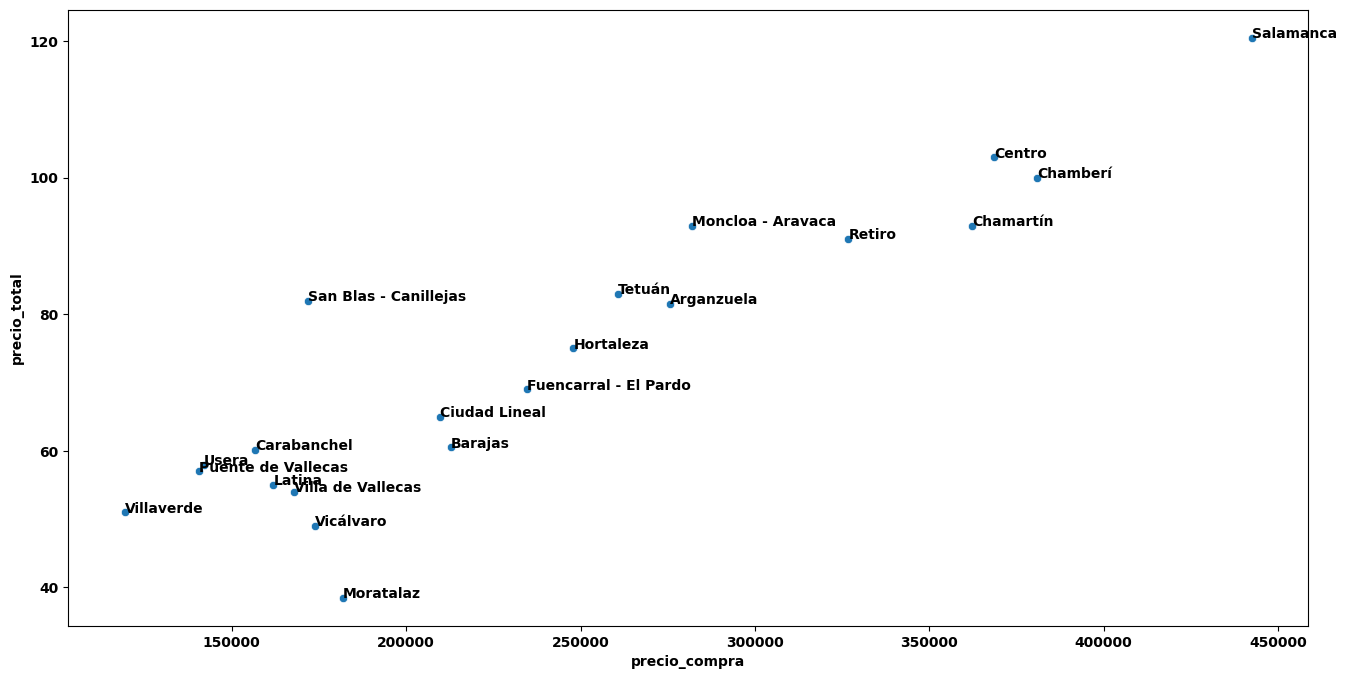

In [147]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=temp, x="precio_compra", y="precio_total")
for elem in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[elem], temp.precio_total.iloc[elem], temp.index[elem])

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Y la excepción de San Blas que ya hemos identificado por qué puede ser. 

Por tanto como era esperable no hay a priori ningún "chollo" claro a este nivel.

Repetimos el análisis a nivel de barrio a ver si identificamos algo.

In [148]:
temp = df.groupby("neighbourhood")[["precio_total", "precio_compra"]].median().sort_values(by="precio_total", ascending=False)
temp

,precio_total,precio_compra
neighbourhood,,
Recoletos,159.0,479310.0
Castellana,156.0,516180.0
Valdemarín,136.5,282000.0
El Viso,135.0,362340.0
Goya,135.0,442440.0
...,...,...
Los Angeles,36.5,119280.0
Fontarrón,33.0,181800.0
Media Legua,32.0,181800.0


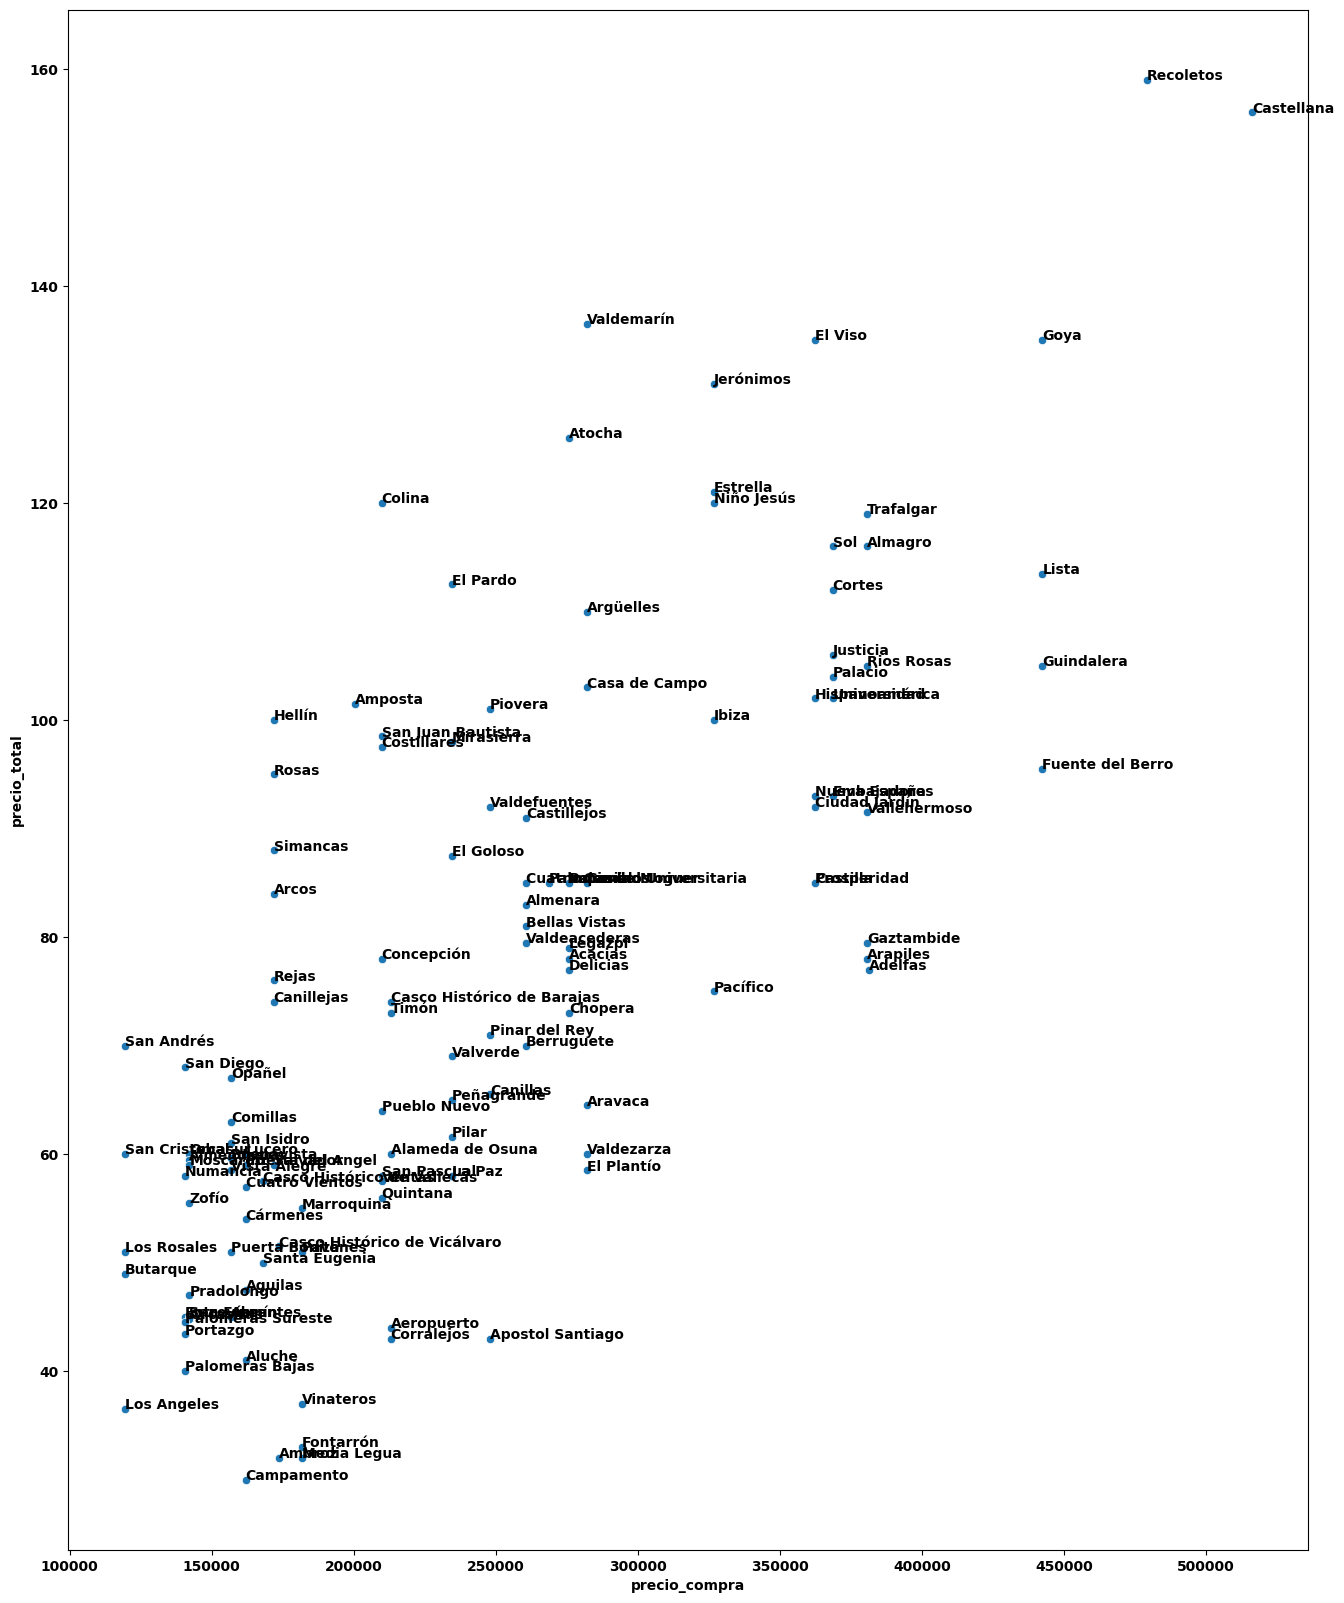

In [149]:
plt.figure(figsize=(16,20))
sns.scatterplot(data=temp, x="precio_compra", y="precio_total")
for elem in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[elem], temp.precio_total.iloc[elem], temp.index[elem])

A nivel barrio se pueden ver más cosas:


* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
    * Bajo: San Andrés, San Diego, Opañel
    * Medio-Bajo: Hellín, Rosas , Simancas, posiblemente los 3 sean de San Blas
    * Medio: Valdemarín, Atocha
    * Medio-alto: Jerónimos, El Viso
    * Alto: Recoletos, Castellana
    
**Insight 1: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

In [150]:
df_analisis.filter(like="disc")

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc
0,01_Una,0-3,1,30-297,02_91%-100%
1,01_Una,0-3,1,30-297,02_91%-100%
2,01_Una,0-3,1,6-29,01_53%-90%
3,04_Cuatro_o_mas,0-3,1,6-29,01_53%-90%
4,01_Una,0-3,1,30-297,00_0%-52%
...,...,...,...,...,...
21314,02_Dos,4,2,0-5,00_0%-52%
21315,01_Una,0-3,1,0-5,00_0%-52%
21316,01_Una,0-3,1,0-5,00_0%-52%
21317,02_Dos,4,3,0-5,00_0%-52%


Para responder a esta pregunta, creamos un minicubo, ya que hemos discretizado las variables de análisis.

In [151]:
metricas =["precio_total", "precio_compra"]
dimensiones=["bedrooms_disc", "accommodates_disc", "beds_disc", "ocupacion_disc"]
minicubo_precio = df_analisis[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,ocupacion_disc,precio_total,precio_compra
0,01_Una,0-3,1,02_91%-100%,85.0,362340
1,01_Una,0-3,1,02_91%-100%,65.0,368640
2,01_Una,0-3,1,01_53%-90%,31.0,161940
3,04_Cuatro_o_mas,0-3,1,01_53%-90%,94.0,921600
4,01_Una,0-3,1,00_0%-52%,29.0,275700
...,...,...,...,...,...,...
21314,02_Dos,4,2,00_0%-52%,120.0,165760
21315,01_Una,0-3,1,00_0%-52%,120.0,442440
21316,01_Una,0-3,1,00_0%-52%,171.0,260640
21317,02_Dos,4,3,00_0%-52%,74.0,444290


In [152]:
df_analisis.bedrooms_disc.value_counts()

bedrooms_disc
01_Una             14667
02_Dos              4406
03_Tres             1664
04_Cuatro_o_mas      582
Name: count, dtype: int64

In [153]:
minicubo_precio= minicubo_precio.melt(id_vars= metricas)
minicubo_precio

,precio_total,precio_compra,variable,value
0,85.0,362340,bedrooms_disc,01_Una
1,65.0,368640,bedrooms_disc,01_Una
2,31.0,161940,bedrooms_disc,01_Una
3,94.0,921600,bedrooms_disc,04_Cuatro_o_mas
4,29.0,275700,bedrooms_disc,01_Una
...,...,...,...,...
85271,120.0,165760,ocupacion_disc,00_0%-52%
85272,120.0,442440,ocupacion_disc,00_0%-52%
85273,171.0,260640,ocupacion_disc,00_0%-52%
85274,74.0,444290,ocupacion_disc,00_0%-52%


In [154]:
minicubo_precio= minicubo_precio.groupby(["variable", "value"])[metricas].agg("median")
minicubo_precio

precio_total  precio_compra
variable          value                                       
accommodates_disc 0-3                      69.0       368640.0
                  4                       111.0       368640.0
                  5-16                    160.0       430080.0
bedrooms_disc     01_Una                   75.0       368640.0
                  02_Dos                  130.0       430080.0
                  03_Tres                 174.0       552960.0
                  04_Cuatro_o_mas         261.0       737280.0
beds_disc         1                        80.0       368640.0
                  2                       135.0       430080.0
                  3                       150.0       430080.0
                  4-39                    199.0       552960.0
ocupacion_disc    00_0%-52%                94.0       368640.0
                  01_53%-90%               87.0       368640.0
                  02_91%-100%              91.0       368640.0

In [155]:
minicubo_precio.loc["bedrooms_disc"]

,precio_total,precio_compra
value,,
01_Una,75.0,368640.0
02_Dos,130.0,430080.0
03_Tres,174.0,552960.0
04_Cuatro_o_mas,261.0,737280.0


''

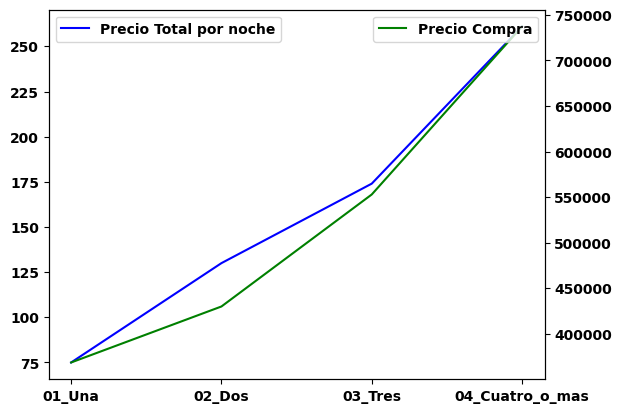

In [156]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc["bedrooms_disc"].precio_total, color="blue", label="Precio Total por noche")
ax2= ax.twinx()
ax2.plot(minicubo_precio.loc["bedrooms_disc"].precio_compra, color="green", label="Precio Compra")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
;

- En cuanto al número de habitaciones no hay nada que destacar.

- Existe una relación lineal entre el precio de compra y el precio total que se puede cobrar.

- Parte de este efecto puede ser artificial, ya que hemos utilizado el número de habitaciones para calcular tanto el precio total como el precio de compra.

In [157]:
minicubo_precio.loc["beds_disc"]

,precio_total,precio_compra
value,,
1,80.0,368640.0
2,135.0,430080.0
3,150.0,430080.0
4-39,199.0,552960.0


''

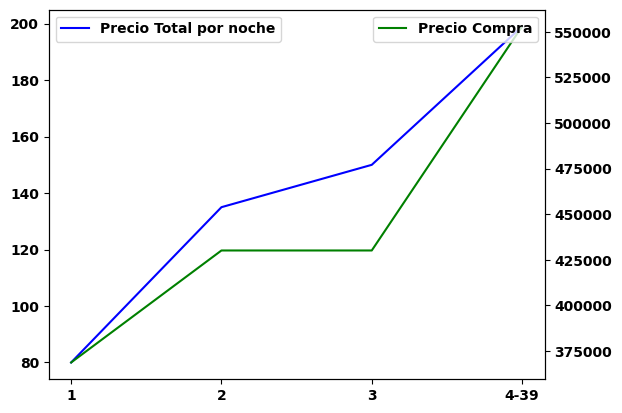

In [158]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc["beds_disc"].precio_total, color="blue", label="Precio Total por noche")
ax2= ax.twinx()
ax2.plot(minicubo_precio.loc["beds_disc"].precio_compra, color="green", label="Precio Compra")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
;

- Se observa un crecimiento constante en el precio total por noche a medida que aumenta el número de camas, con una aceleración significativa después de alcanzar tres camas.

- El precio de compra de la vivienda muestra un crecimiento similar, sin diferencias entre 2 y 3 camas con un aumento más rápido a partir de 3 camas. 

- Por tanto el número óptimo de camas es o una cama o más de 3 camas. 

- Dado que no había este efecto en el número de habitaciones ¿podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso?

- Vamos a revisarlo con algunos ejemplos. 

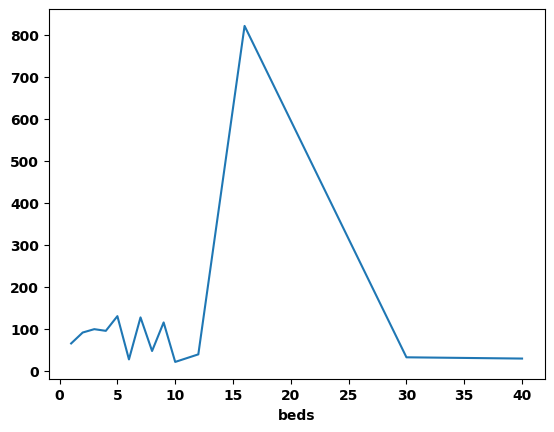

In [161]:
df_analisis[df_analisis.bedrooms == 1].groupby('beds').precio_total.median().plot();

Efectivamente aquí hay algo, ya que figura que para pisos de una habitación hay gente que está metiendo hasta decenas de camas!

Sería un tema a explorar con más detalle y comentar con alguien que conozca el negocio.

Vamos a ver unos ejemplos

In [159]:
df_analisis.loc[(df_analisis.bedrooms==1) & (df_analisis.beds>6)]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,bedrooms,bathrooms,host_is_superhost,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion_disc,metros_2,precio_compra,distancia_a_sol
894,904,904,7110704,Rental unit in Madrid · ★4.0 · 1 bedroom · 7 b...,14573633,Latina,Lucero,40.400830,-3.748840,Entire home/apt,110.0,2,6,301,1.0,1.0,t,6,7.0,4,4.00,4.75,4.50,2699,110.0,17.5,01_Una,5-16,4-39,0-5,00_0%-52%,60,161940,4.239923
1747,1758,1758,15428073,Rental unit in Madrid · ★4.78 · 1 bedroom · 7 ...,32420211,Centro,Universidad,40.421257,-3.706301,Entire home/apt,284.0,1,4,224,1.0,1.0,t,6,7.0,99,4.78,4.89,4.97,6144,284.0,38.6,01_Una,5-16,4-39,30-297,00_0%-52%,60,368640,0.562764
2006,2017,2017,16763469,Bed and breakfast in Madrid · ★4.11 · 1 bedroo...,97914995,Centro,Palacio,40.416160,-3.712650,Shared room,22.0,1,5,351,1.0,3.5,f,8,8.0,84,4.11,4.51,4.76,6144,22.0,3.8,01_Una,5-16,4-39,30-297,00_0%-52%,60,368640,0.791029
6263,6296,6296,40871059,Hostel in Madrid · ★4.65 · 1 bedroom · 40 beds...,314662107,Centro,Embajadores,40.411090,-3.702660,Shared room,29.0,1,6,362,1.0,3.0,f,1,40.0,23,4.65,4.83,4.87,6144,29.0,0.8,01_Una,0-3,4-39,6-29,00_0%-52%,60,368640,0.629700
6501,6535,6535,42086734,Rental unit in Madrid · ★4.07 · 1 bedroom · 8 ...,319616632,Centro,Universidad,40.423050,-3.702880,Private room,175.0,1,22,358,1.0,4.0,f,9,8.0,14,4.07,4.79,4.86,6144,175.0,1.9,01_Una,5-16,4-39,6-29,00_0%-52%,60,368640,0.704267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19962,20030,20030,1013941581520210832,Rental unit in Madrid · ★4.25 · 1 bedroom · 12...,493916828,Centro,Universidad,40.421891,-3.703881,Shared room,39.0,1,45,361,1.0,2.5,f,2,12.0,4,4.25,4.75,5.00,6144,39.0,1.1,01_Una,0-3,4-39,0-5,00_0%-52%,60,368640,0.576086
19995,20063,20063,1012357173035634798,Rental unit in Madrid · ★4.25 · 1 bedroom · 10...,493916828,Centro,Universidad,40.421891,-3.703881,Shared room,21.0,1,45,360,1.0,2.5,f,1,10.0,4,4.25,4.75,5.00,6144,21.0,1.4,01_Una,0-3,4-39,0-5,00_0%-52%,60,368640,0.576086
20070,20138,20138,1015759084197790290,Rental unit in Madrid · ★4.0 · 1 bedroom · 12 ...,493916828,Centro,Universidad,40.421891,-3.703881,Shared room,62.0,1,45,362,1.0,2.5,f,3,12.0,3,4.00,4.00,5.00,6144,62.0,0.8,01_Una,0-3,4-39,0-5,00_0%-52%,60,368640,0.576086
20077,20145,20145,1015771752892144594,Rental unit in Madrid · ★New · 1 bedroom · 12 ...,493916828,Centro,Universidad,40.421891,-3.703881,Shared room,92.0,1,45,362,1.0,2.5,f,4,12.0,1,4.00,4.00,5.00,6144,92.0,0.8,01_Una,4,4-39,0-5,00_0%-52%,60,368640,0.576086


- Vemos que hay 77 viviendas en las que para inmuebles de 1 habitación se ponen más de 6 camas. 

**Revisamos los huespedes que se aceptan**

In [162]:
minicubo_precio.loc["accommodates_disc"]

,precio_total,precio_compra
value,,
0-3,69.0,368640.0
4,111.0,368640.0
5-16,160.0,430080.0


''

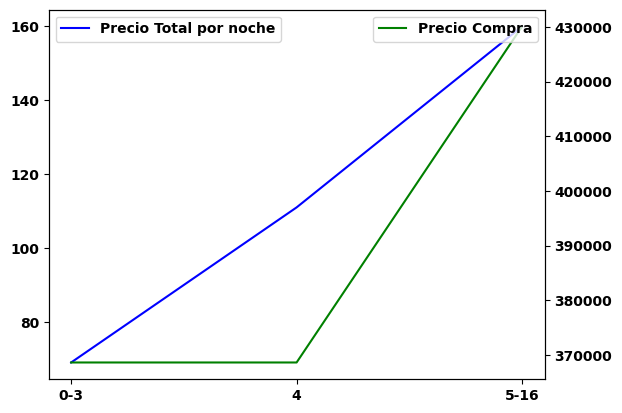

In [163]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc["accommodates_disc"].precio_total, color="blue", label="Precio Total por noche")
ax2= ax.twinx()
ax2.plot(minicubo_precio.loc["accommodates_disc"].precio_compra, color="green", label="Precio Compra")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
;

**Insight 2: El Numero optimo de huespedes esta en 3 personas. No hay mucha diferencia con viviendas de 0 a 3 personas. A partir de 5 el piso necesita ser mayor y el precio de compra se incrementa bastante**

#### Guardamos el dataset en la base de datos

In [164]:
con = sa.create_engine("sqlite:///Datos2023/airbnb.db")
df_analisis.to_sql("df_analisis", con=con,if_exists="replace", index=False)

21319

### Analisis de la distancia del inmueble a Sol

In [165]:
df_analisis.groupby("neighbourhood_group")["distancia_a_sol"].median().sort_values()

neighbourhood_group
Centro                    0.720465
Arganzuela                1.797363
Chamberí                  2.056675
Moncloa - Aravaca         2.110399
Retiro                    2.449518
Salamanca                 2.827033
Latina                    3.318384
Carabanchel               3.498564
Usera                     3.783360
Puente de Vallecas        4.274353
Chamartín                 4.524691
Tetuán                    4.663274
Moratalaz                 5.000908
Ciudad Lineal             5.142403
Villaverde                7.529505
Fuencarral - El Pardo     7.549266
Hortaleza                 7.945373
San Blas - Canillejas     8.081538
Vicálvaro                 8.691357
Villa de Vallecas         8.828834
Barajas                  11.573973
Name: distancia_a_sol, dtype: float64

Centro                    
Arganzuela                
Chamberí                  
Moncloa - Aravaca       
Retiro                    
Latina               

In [166]:
distritos = df_analisis.groupby("neighbourhood_group")["distancia_a_sol"].median().sort_values()[0:7].index.to_list()

In [167]:
distritos

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

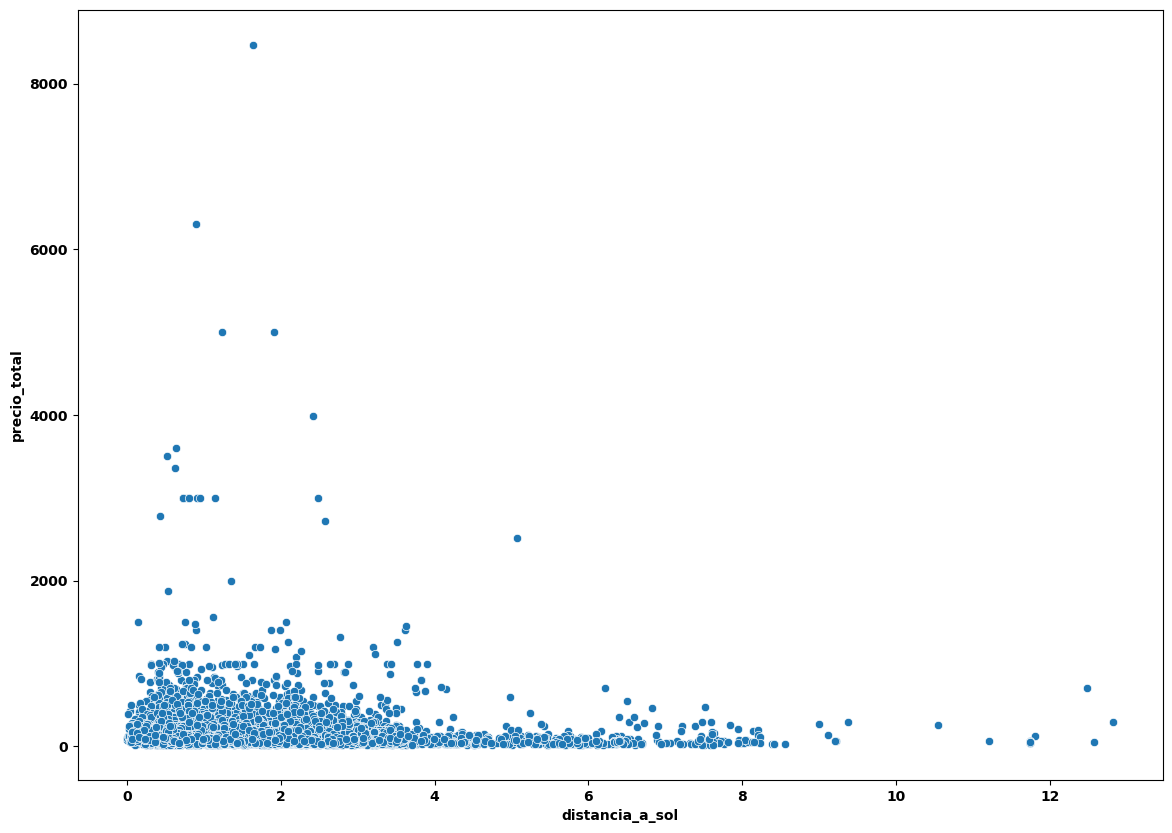

In [168]:
plt.figure(figsize=(14,10))
sns.scatterplot(data= df_analisis.loc[df_analisis.neighbourhood_group.isin(distritos)], x="distancia_a_sol", y="precio_total");

- Parece que no existe una relacion muy clara entre la distancia a la puerta del sol con el precio por noche que se puede pedir.
- Se podria ver que perfil de inmueble son los que piden por noche más de 2000 euros
- Previsiblemente tendrán menor precio de compra
- Parece que la cercanía a puntos de interés no tiene un especial impacto sobre el precio del alquiler

# Analisis Geográfico sobre un mapa 

In [169]:
import folium

In [170]:
lat1 = 40.4167278
lon1 = -3.7033387

In [171]:
folium.Map(location=[lat1, lon1], zoom_start=12)

In [172]:
datos = df_analisis.loc[df_analisis.neighbourhood_group=="San Blas - Canillejas"].copy()

In [173]:
mapa = folium.Map(location=[lat1, lon1], zoom_start=12)

In [174]:
for flat in range(0, len(datos)):
    folium.Marker(
    location=[datos.iloc[flat]["latitude"],datos.iloc[flat]["longitude"]], 
    popup=datos.iloc[flat]["precio_total"]).add_to(mapa)
    
mapa

In [176]:
datos["precio_total_disc"] = pd.qcut(datos["precio_total"], q=[0, 0.25, 0.5, 0.75, 1], 
       labels=["blue", "purple", "orange","red"])

In [177]:
mapa = folium.Map(location=[lat1, lon1], zoom_start=12)

In [178]:
for flat in range(0, len(datos)):
    folium.CircleMarker(
    location=[datos.iloc[flat]["latitude"],datos.iloc[flat]["longitude"]], 
    popup=datos.iloc[flat]["precio_total"], 
    fill=True, 
    color =datos.iloc[flat]["precio_total_disc"], 
    fill_opacity=0.5, 
    radius=5).add_to(mapa)
    
mapa

**Existen todavía muchos puntos morados y azules, lo cual puede indicar que todavía existe potencial para explotar más el factor de los eventos deportivos**

**Mapa sobre los precios en el distrito de chamartín**

In [179]:
datos = df_analisis.loc[df_analisis.neighbourhood_group=="Chamartín"].copy()

In [180]:
datos["precio_total_disc"] = pd.qcut(datos["precio_total"], q=[0, 0.25, 0.5, 0.75, 1], 
       labels=["blue", "purple", "orange","red"])

In [181]:
mapa = folium.Map(location=[lat1, lon1], zoom_start=12)

In [182]:
for flat in range(0, len(datos)):
    folium.CircleMarker(
    location=[datos.iloc[flat]["latitude"],datos.iloc[flat]["longitude"]], 
    popup=datos.iloc[flat]["precio_total"], 
    fill=True, 
    color =datos.iloc[flat]["precio_total_disc"], 
    fill_opacity=0.5, 
    radius=5).add_to(mapa)

mapa